Trabajo Analítica predictiva
====
---
<h3>Pedro Turriago Sanchez</h3>
**pturriago@unal.edu.co**   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia  
Url github: https://github.com/petusan36/TrabajoAnaliticaPredictiva/blob/master/DataBankMarketingDataSet-AnalysisPython.ipynb  
DataSet: bank_af.csv   
Ruta DataSet github: https://github.com/petusan36/TrabajoAnaliticaPredictiva/blob/master/bank_af.csv  
nbviewer:https://nbviewer.jupyter.org/github/petusan36/TrabajoAnaliticaPredictiva/blob/master/DataBankMarketingDataSet-AnalysisPython.ipynb

---
Contenido
== 
- <h2> Definición del problema real </h2>
    - <h3>Objetivo</h3>
- <h2>Información de atributos </h2>
    - <h3> Variables de entrada </h3>
        - <h4> Datos del cliente</h4>
    - <h3> Importación de las librerias </h3>
    - <h3> Definición de funciones </h3>
    - <h3> Importación de los datos </h3>
- <h2> Fase de exploración y limpieza de la información </h2>
    - <h3> Análisis exploratorio Nro 1 </h3>
        - <h4> Modelamiento Nro 1 </h4>
            - <h5> Linear Regresion (Regesión lineal / regresión logística)</h5>
                - Entrenamiento
                - Prueba
                - Matriz de confusión
        - <h4> Primeras conclusiones </h4>
    - <h3> Análisis exploratorio Nro 2 </h3>
        - <h4> Modelamiento Nro 2 </h4>
            - <h5>Linear Regresion (Regesión lineal / regresión logística)</h5>
                - Entrenamiento
                    - Matriz de confusión
                - Prueba
                    - Matriz de confusión
            - <h5>Knn (K-Nearest Neighbors)</h5>
                - Entrenamiento
                    - Matriz de confusión
                - Prueba
                    - Matriz de confusión
            - <h5>Decision tree (Árbol de decisión)</h5>
                - Entrenamiento
                    - Matriz de confusión
                - Prueba
                    - Matriz de confusión
            - <h5>SVM - Support vector machine (Máquinas de vectores de soporte)</h5>
                - Entrenamiento
                    - Matriz de confusión
                - Prueba
                    - Matriz de confusión
        - <h4> Segundas conclusiones </h4>
- <h2> Análisis final por matriz de conclusiones para los modelos utilizados</h2>
    - <h4>Recomendaciones</h4>

---
Definición del problema real
====
Los datos están relacionados con las campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requirió más de un contacto para el mismo cliente, para conocer si el producto (depósito a plazo bancario) estaría suscrito ('sí') o no ('no').

<h2>Objetivo</h2>

El objetivo de la clasificación es predecir si el cliente suscribirá (sí / no) un depósito a plazo (variable y).

---

# Información de atributos

## Variables de entrada:

### Datos del cliente:
1. Age: edad, (numérico)
2. job : trabajo,  tipo de trabajo (categórico: 'admin.', 'Trabajador', 'empresario', 'empleada doméstica', 'gerente', 'jubilado', 'autónomo', 'servicios', 'estudiante' , 'técnico', 'desempleado', 'desconocido')
3. marital: estado civil (categórico: "divorciado", "casado", "soltero", "desconocido"; nota: "divorciado" significa divorciado o viudo)
4. education : educación (categórica: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'analfabeto', 'professional.course', 'university.degree', 'unknown')
5. default; predeterminado, ¿tiene crédito en defecto? (categórico: 'no', 'sí', 'unknown')
6. housing: vivienda, ¿tiene préstamo de vivienda? (categórico: 'no', 'sí', 'unknown')
7. loan: préstamo, tiene préstamo personal? (categórico: 'no', 'sí', 'unknown')

#### relacionado con el último contacto de la campaña actual:

8. contact: contacto, tipo de comunicación de contacto (categórico: 'celular', 'teléfono')
9. month: mes, último mes del año del contacto (categórico: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: día de la semana,  último día de contacto de la semana (categórico: 'mon', 'tue', 'wed', 'thu', 'fri')
11. duration: duración, duración del último contacto, en segundos (numérico). 

*** Nota importante: *** este atributo afecta en gran medida al objetivo de salida (por ejemplo, si la duración = 0, entonces y = 'no'). Sin embargo, la duración no se conoce antes de que se realice una llamada. Además, después del final de la llamada y es obviamente conocido. Por lo tanto, esta información solo debe incluirse para fines de referencia y debe descartarse si la intención es tener un modelo predictivo realista.

#### otros atributos:
12. campaign: campaña, número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto)
13. pdays: días, número de días que pasaron después de que el cliente fue contactado por última vez de una campaña anterior (numérico; 999 significa que el cliente no fue contactado previamente)
14. previous: anterior, número de contactos realizados antes de esta campaña y para este cliente (numérico)
15. poutcome: resultado de la campaña de marketing anterior (categórica: 'fracaso', 'inexistente', 'éxito')

#### atributos del contexto social y económico
16. emp.var.rate: tasa de variación del empleo - indicador trimestral (numérico)
17. cons.price.idx: índice de precios al consumidor - indicador mensual (numérico)
18. cons.conf.idx: índice de confianza del consumidor - indicador mensual (numérico)
19. euribor3m: euribor tasa de 3 meses - indicador diario (numérico)
20. nr.employed: número de empleados - indicador trimestral (numérico)

#### Variable de salida (objetivo deseado):
21. y: ¿El cliente ha suscrito un depósito a plazo? (binario: 'sí', 'no')  
*** Nota: *** se va a usar la variable "y" para realizar los grupos de clasificación

---

### Importación de las librerias

In [3]:
# Definición y carga de las librerias
from random import sample
import os
import ipyparallel as ipp
rc = ipp.Client()
ar = rc[:].apply_async(os.getpid)
pid_map = ar.get_dict()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
# from scipy.stats import mode
import numpy as np
import pandas as pd
pd.set_option('display.max_row', 1000)                         
pd.set_option('display.max_columns', 50) 
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_similarity_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

### Definición de funciones

In [4]:
# Factorizar
def factor(dataset,full=0):
    enc = LabelEncoder()
    labels=dataset._get_numeric_data().columns
    for n in range(len(dataset.columns)):
        if df.columns[n] not in labels:
            dataset[dataset.columns[n]] = enc.fit_transform(dataset[dataset.columns[n]])
        if full== 1:
            dataset[dataset.columns[n]] = enc.fit_transform(dataset[dataset.columns[n]])
    return(dataset)

# Función para buscar valores y remplazar por otros, se hace para cambiar a nulos valores como los uknonw
def nulos(dataset, valini="",valfin=""):
    new=dataset.copy()
    for n in range(len(dataset.columns)):
        if valfin == "Nulos":
            new[dataset.columns[n]]=dataset[dataset.columns[n]].replace([valini],np.NaN)
        else:
            new[dataset.columns[n]]=dataset[dataset.columns[n]].replace([valini],valfin)
    return(new)

# Función para describir los tipos de datos de un dataset
def data_description_ltype(dataset): 
    ds=dataset.dtypes
    ds=pd.DataFrame(ds)
    ds=ds.reset_index()
    ds.columns=['variables','tipos']
    return(ds)

# Función que captura las etiquetas de un dataset y las devuelve en un nuevo dataframe
def get_labels(dataset,objetive=''):
    target = dataset.loc[:,[objetive]].values
    labels_target=pd.DataFrame(dataset.loc[:,[objetive]].columns, columns=['target'])
    labels=pd.DataFrame(dataset.columns, columns=['full'])
    labels=labels[labels['full']!= objetive]
    labels_num=dataset._get_numeric_data().columns
    labels_text=pd.DataFrame(dataset.drop(labels_num[0],axis=1, inplace=False).columns[:-1], columns=['text'])
    labels_num=pd.DataFrame(labels_num, columns=['num'])
    l= pd.concat([labels,labels_text,labels_num, labels_target], axis=1)
    return(l)

# Función para realizar el balanceo de la información
def balanceo(data,objetivo='',tam_muestra=80):
    if objetivo=='':
        return(print('ingrese la variable objetivo para dividir el tamaño de la muestra'))
    df_y_yes=(data[data[objetivo]==1.0].reset_index()).drop('index', axis=1)
    df_y_no=(data[data[objetivo]==0.0].reset_index()).drop('index', axis=1)
    N=((data[objetivo][data[objetivo]==1].count()*tam_muestra)/100).astype(int)
    rows_y=list(range(0, len(df_y_yes)))
    rows_n=list(range(0, len(df_y_no)))
    ran_row_y=sample(rows_y,k=N)
    ran_row_n=sample(rows_n,k=N)
    finalDf_train=pd.concat([pd.DataFrame(df_y_yes, index=ran_row_y), pd.DataFrame(df_y_no, index=ran_row_n)])
    finalDf_train=finalDf_train.sort_index()
    finalDf_test=pd.concat([df_y_yes.drop(df_y_yes.index[ran_row_y], inplace=False), df_y_no.drop(df_y_no.index[ran_row_y], inplace=False)])
    finalDf_test=finalDf_test.sort_index().reset_index().drop('index', axis=1)
    return(finalDf_train, finalDf_test)

# Función para filtrar datos no nulos
def limpiar_labels(label,columna):
    l=pd.DataFrame(label[columna])
    l=nulos(l,np.NaN,'unknwon')
    l=l[columna][l[columna] != 'unknwon']
    return(l)

# Funciones de graficación-------------------------------

#Estilo correlación
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "8pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

# Mapa de correlación
def correl(correlacion):
    cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
    return (correlacion.style.background_gradient(cmap, axis=1)\
        .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
        .set_caption("Matriz de correlación")\
        .set_precision(2)\
        .set_table_styles(magnify()))

# Gráficas verticales
def grafica_ver(data,columna='', titulo='Gráfica',yetiqueta=''):
    if columna == '':
        return(print('ingrese parametros'))
    ax = data[columna].value_counts().plot(kind='bar', figsize=(10,5), color="coral", fontsize=13);
    ax.set_alpha(0.2)
    ax.set_title(titulo, fontsize=12)
    ax.set_ylabel(yetiqueta, fontsize=12);
    ax.set_yticks([0, len(data)+1000])
    totals = []
    for i in ax.patches:
        totals.append(i.get_height())
    total = sum(totals)
    for i in ax.patches:
        ax.text(i.get_x()+.12, i.get_height()-3, \
                str(i.get_height())+'\n('+str(round((i.get_height()/len(data))*100, 2))+'%)', fontsize=12,
                    color='dimgrey')

# Gráficas horizontales
def grafica_hor(data,columna='', titulo='Gráfica',xetiqueta='x'):
    if columna == '':
        return(print('ingrese parametros'))
    
    ax =data[columna].value_counts().plot(kind='barh', figsize=(10,5), color="teal", fontsize=13);
    ax.set_alpha(0.2)
    ax.set_title(titulo, fontsize=12)
    ax.set_xlabel(xetiqueta, fontsize=12);
    ax.set_xticks([0, len(data)])
    totals = []                                          # create a list to collect the plt.patches data
    for i in ax.patches:                                 # find the values and append to list
        totals.append(i.get_width())
    total = sum(totals)                                  # set individual bar lables using above list
    for i in ax.patches:                                 
        ax.text(i.get_width()+.3, i.get_y()+.38, \
                str(i.get_width())+' ('+str(round((i.get_width()/len(data))*100, 2))+'%)', fontsize=12, color='dimgrey')
    return(ax.invert_yaxis())                            # invert for largest on top 

# Gráficas de nulos
def grafica_nul(data):
    df_limpiar=data.copy()
    df_limpiar= nulos(df_limpiar,'unknown','Nulos')
    df_limpiar= nulos(df_limpiar,999,'Nulos')
    df_limpiar=pd.DataFrame(df_limpiar.isnull().sum(), columns=['nulos'])
    df_limpiar = df_limpiar[df_limpiar.nulos != 0]
    df_limpiar=df_limpiar.sort_values('nulos', ascending=False)
    ax =df_limpiar['nulos'].plot(kind='barh', figsize=(10,5), color="salmon", fontsize=13);
    ax.set_alpha(0.2)
    ax.set_title('Datos Nulos', fontsize=12)
    ax.set_xlabel('Cantidad', fontsize=12);
    ax.set_xticks([0, len(data)])
    totals = []                                          
    for i in ax.patches:                                 
        totals.append(i.get_width())
    total = sum(totals)                                 
    for i in ax.patches:                                 
        ax.text(i.get_width()+.3, i.get_y()+.38, \
                str(i.get_width())+' ('+str(round((i.get_width()/len(data))*100, 2))+'%)', fontsize=12, color='red')
    return(ax.invert_yaxis())

# Gráficas de puntuaciones de los clasificadores
def grafica_scores(modelo, x_test, y_test, y_pred): 
    print("Score:",modelo.score(x_test,y_test))
    print("accuracy_score:",accuracy_score(y_true = y_test, y_pred = y_pred))
    print("Tasa de error:",1-accuracy_score(y_true = y_test, y_pred = y_pred))
    print("jaccard_similarity_score",jaccard_similarity_score(y_true=y_test, y_pred=y_pred))
    print(print("\n\nclassification_report\n---------------------\n",classification_report(y_true=y_test, y_pred=y_pred)))

# Gráfica de matriz de confusión
def grafica_matriz_confusion(modelo, ax='', titulo=''):
    if ax=='':
        ax= plt.subplot();
    sns.heatmap(modelo, annot=True, ax = ax,square=True, cmap="YlGnBu", annot_kws={"size":12}, fmt="d");
    ax.set_xlabel('Predicción\n' , fontsize='16');
    ax.set_ylabel('Verdaderos\n' , fontsize='16'); 
    ax.set_title('Matriz de confusión '+titulo+'\n', fontsize='18'); 
    ax.xaxis.set_ticklabels(['no', 'yes'], fontsize='16'); 
    ax.yaxis.set_ticklabels(['no', 'yes'], fontsize='16');
# --------------------------------------

## Importación de los datos

---
## Fase de exploración y limpieza de la información

In [5]:
df = pd.read_csv('bank_af.csv', delimiter=";")
df_limpiar = df.copy()
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Análisis exploratorio Nro. 1

* Se observan variables de diferentes tipos

In [6]:
tot_var=len(df.columns)
num_var=len(df._get_numeric_data().columns)
print(df.dtypes, "\n\nTotal de variables", tot_var, "\nNuméricas", num_var, "\nObjetos", tot_var-num_var, "\nTotal de registros", len(df))

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object 

Total de variables 21 
Numéricas 10 
Objetos 11 
Total de registros 41188


* Se hace descripción de los datos actuales y se observan desviaciones altas en algunas de las variables.
* De las 22 variables, incialmente se pueden describir solamente 10 que son las numéricas(cuantitativas).

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


* Se aplican conversiones de los datos tipo objeto a tipo numéricos, respetando los datos númericos de las demás variables y se verifican nuevamente los tipos de datos

In [8]:
df=factor(df)
tot_var=len(df.columns)
num_var=len(df._get_numeric_data().columns)
print(df.dtypes, "\n\nTotal de variables", tot_var, "\nNuméricas", num_var, "\nObjetos", tot_var-num_var, "\nTotal de registros", len(df))

age                 int64
job                 int64
marital             int64
education           int64
default             int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week         int64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object 

Total de variables 21 
Numéricas 21 
Objetos 0 
Total de registros 41188


* Se observan nuevamente los datos se observan desviaciones altas en algunas de las variables.
* Ya se pueden observar las 22 variables del dataset

In [9]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
5,45,7,1,2,1,0,0,1,6,1,198,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,5,0,0,0,1,6,1,139,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
7,41,1,1,7,1,0,0,1,6,1,217,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
8,24,9,2,5,0,2,0,1,6,1,380,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
9,25,7,2,3,0,2,0,1,6,1,50,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
job,41188.0,3.724580,3.594560,0.000,0.000,2.000,7.000,11.000
marital,41188.0,1.172769,0.608902,0.000,1.000,1.000,2.000,3.000
education,41188.0,3.747184,2.136482,0.000,2.000,3.000,6.000,7.000
default,41188.0,0.208872,0.406686,0.000,0.000,0.000,0.000,2.000
housing,41188.0,1.071720,0.985314,0.000,0.000,2.000,2.000,2.000
loan,41188.0,0.327425,0.723616,0.000,0.000,0.000,0.000,2.000
contact,41188.0,0.365252,0.481507,0.000,0.000,0.000,1.000,1.000
month,41188.0,4.230868,2.320025,0.000,3.000,4.000,6.000,9.000
day_of_week,41188.0,2.004613,1.397575,0.000,1.000,2.000,3.000,4.000


* Hacemos una exploración visual de la información usando gráficos de densidad
* Se obseva que la información esta en diferentes escalas, por lo cual se debe aplicar un metodo de escalado más adelante para poder entrenar y probar los diferentes modelos seleccionados

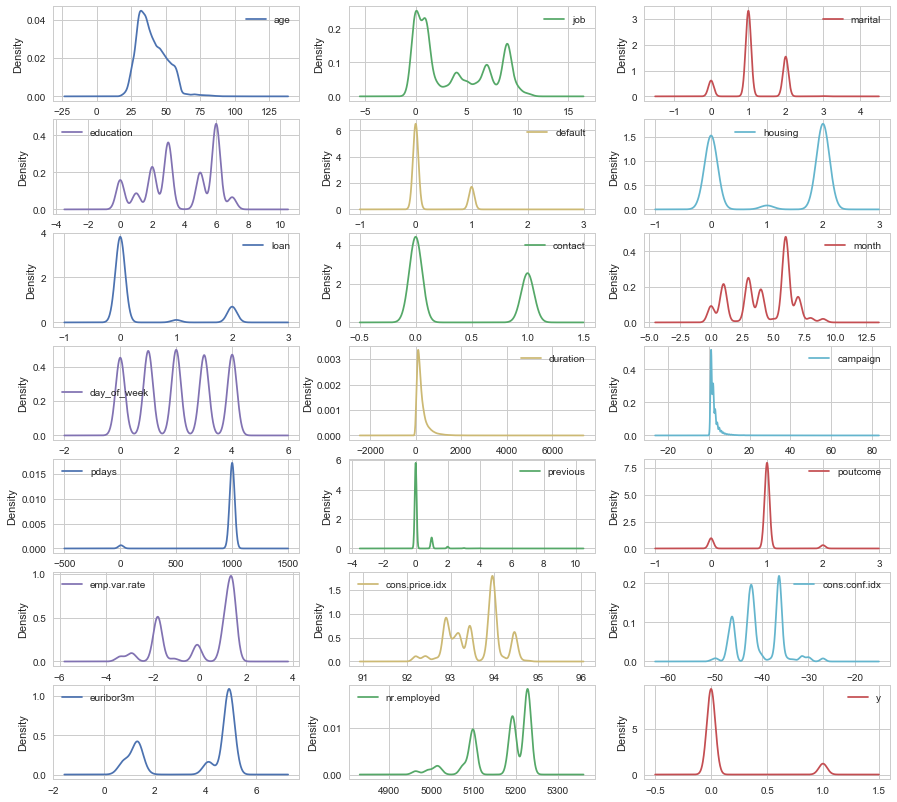

In [11]:
df.plot(kind='density', subplots=True, layout=(17,3), sharex=False, figsize=(15,35))
plt.show();

* Los datos contienen información que debe ser depurada. Dentro del set de datos contiene valores "unknown" y "999" que no son validos para el análisis ya que no están asociados a los valores reales que se pueden encontrar dentro de la variable. Para esto se debe decidir si se completan los datos o se omiten para la exploración y creación del modelo.

In [12]:
pd.DataFrame(df.isnull().sum(), columns=['Conteo']).transpose()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
Conteo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


* Como se hizo una transformación, los datos "Unknwon" fueron vueltos numeros y se representaron como un número, pero para esta exploración es importante que cantidad de nulos existen; por esto se debe hacer una limpieza de estos valores anter de volverlos factor.  

* Se observa que existe una variable (pdays, education) que no aporta valor para el análisis

In [13]:
df_limpiar= nulos(df_limpiar,'unknown','Nulos')
df_limpiar= nulos(df_limpiar,999,'Nulos')
print("Nulos")
pd.DataFrame(df_limpiar.isnull().sum(), columns=['Conteo']).transpose()
print("\nNo nulos")
pd.DataFrame(df_limpiar.count(), columns=['Conteo']).transpose()

Nulos


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
Conteo,0,330,80,1731,8597,990,990,0,0,0,2,0,39673,0,0,0,0,0,0,0,0



No nulos


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
Conteo,41188,40858,41108,39457,32591,40198,40198,41188,41188,41188,41186,41188,1515,41188,41188,41188,41188,41188,41188,41188,41188


* Los datos quedan de la siguiente manera

In [14]:
df_limpiar=df_limpiar.drop(['pdays','education', 'duration'], axis=1)
print("Nulos")
pd.DataFrame(df_limpiar.isnull().sum(),columns=['Conteo']).transpose()
print("\nNo nulos")
pd.DataFrame(df_limpiar.count(), columns=['Conteo']).transpose()

Nulos


,age,job,marital,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
Conteo,0,330,80,8597,990,990,0,0,0,0,0,0,0,0,0,0,0,0



No nulos


,age,job,marital,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
Conteo,41188,40858,41108,32591,40198,40198,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188


* Para los demás datos se aplican factores

In [15]:
df_limpiar= nulos(df_limpiar,np.NaN,'unknwon')
df_limpiar=factor(df_limpiar,1)
df_limpiar.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,23.023623,10.418993,0.0,15.0,21.0,30.0,77.0
job,41188.0,3.724580,3.594560,0.0,0.0,2.0,7.0,11.0
marital,41188.0,1.172769,0.608902,0.0,1.0,1.0,2.0,3.0
default,41188.0,0.208872,0.406686,0.0,0.0,0.0,0.0,2.0
housing,41188.0,1.071720,0.985314,0.0,0.0,2.0,2.0,2.0
loan,41188.0,0.327425,0.723616,0.0,0.0,0.0,0.0,2.0
contact,41188.0,0.365252,0.481507,0.0,0.0,0.0,1.0,1.0
month,41188.0,4.230868,2.320025,0.0,3.0,4.0,6.0,9.0
day_of_week,41188.0,2.004613,1.397575,0.0,1.0,2.0,3.0,4.0
campaign,41188.0,1.566840,2.758711,0.0,0.0,1.0,2.0,41.0


* Se mira la distribución de la información en las variables, con la factorización aplicada

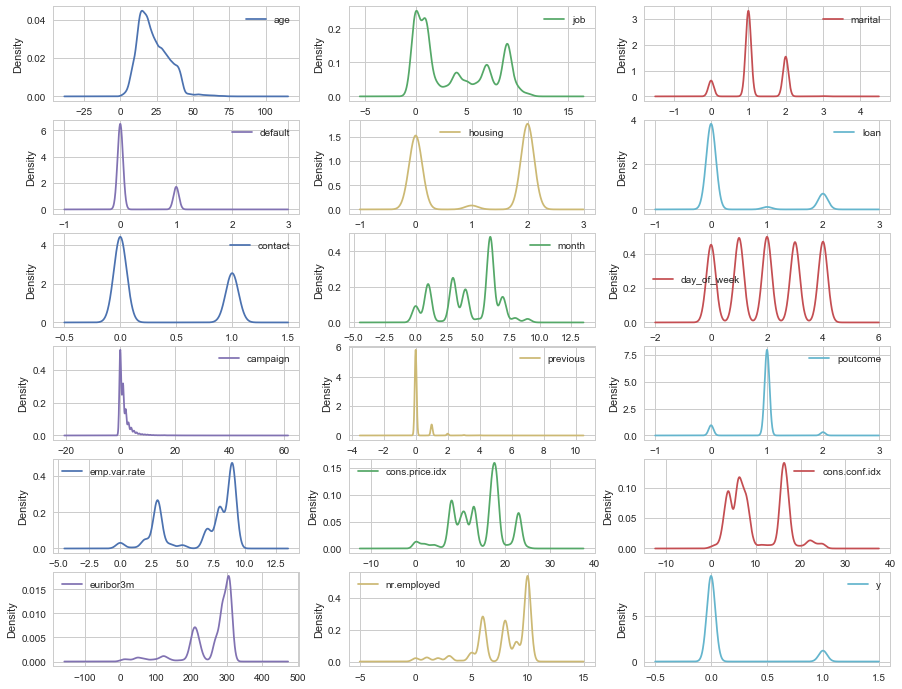

In [16]:
df_limpiar.plot(kind='density', subplots=True, layout=(17,3), sharex=False, figsize=(15,35))
plt.show();

* Veo que tan dispersos están los datos

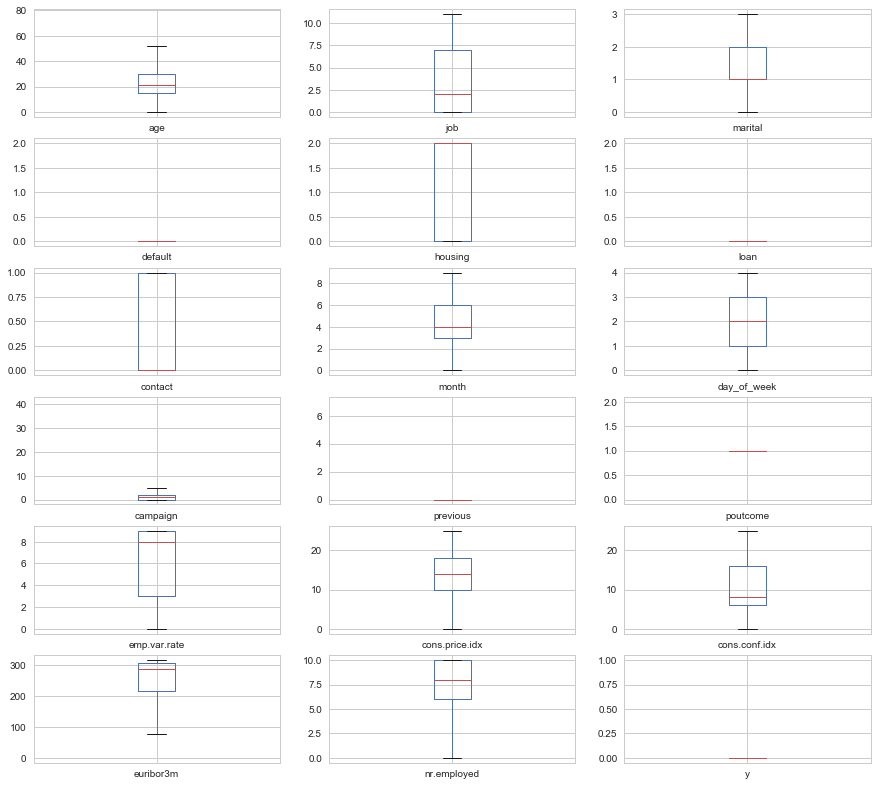

In [17]:
df_limpiar.plot(kind='box', subplots=True, layout=(17,3), sharex=False, sharey=False, figsize=(15,40))
plt.show();

* Observamos la matriz de correlación para ver entre variables el comportamiento.

In [18]:
correlations = df_limpiar.corr()
correl(correlations)

,age,job,marital,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1,0.0012,-0.39,0.16,-0.0016,-0.0074,0.0071,-0.025,-0.018,0.0047,0.024,0.02,0.0023,-0.0061,0.13,-0.048,-0.026,0.03
job,0.0012,1,0.028,-0.028,0.007,-0.01,-0.025,-0.033,-0.00084,-0.0068,0.021,0.012,-0.0036,-0.017,0.057,-0.025,-0.022,0.025
marital,-0.39,0.028,1,-0.079,0.01,0.0058,-0.055,-0.0076,0.0022,-0.0073,0.039,0.0019,-0.082,-0.056,-0.028,-0.079,-0.08,0.046
default,0.16,-0.028,-0.079,1,-0.016,-0.0038,0.14,-0.016,-0.0087,0.033,-0.1,0.023,0.19,0.17,0.02,0.19,0.18,-0.099
housing,-0.0016,0.007,0.01,-0.016,1,0.044,-0.082,-0.018,0.0033,-0.011,0.021,-0.012,-0.056,-0.079,-0.029,-0.041,-0.036,0.012
loan,-0.0074,-0.01,0.0058,-0.0038,0.044,1,-0.0086,-0.0057,-0.0093,0.005,-0.0013,-0.0015,0.0013,-0.002,-0.012,0.0051,0.0055,-0.0049
contact,0.0071,-0.025,-0.055,0.14,-0.082,-0.0086,1,0.28,-0.0096,0.077,-0.21,0.12,0.35,0.58,0.24,0.27,0.18,-0.14
month,-0.025,-0.033,-0.0076,-0.016,-0.018,-0.0057,0.28,1,0.028,-0.062,0.1,-0.065,-0.19,-0.0064,-0.019,-0.2,-0.27,-0.0061
day_of_week,-0.018,-0.00084,0.0022,-0.0087,0.0033,-0.0093,-0.0096,0.028,1,-0.038,-0.0041,0.019,0.036,0.0022,0.035,0.023,0.023,0.016
campaign,0.0047,-0.0068,-0.0073,0.033,-0.011,0.005,0.077,-0.062,-0.038,1,-0.079,0.033,0.15,0.13,-0.024,0.13,0.14,-0.067


* De la matriz de correlación se puede observar que hay otras variables que no aportan valor para el análisis, se escogen una de las fuertemente correlacionadas y se eliminan: euribor3m, nr.employed, cons.conf.idx, cons.price.idx; además en la explicación del tipo de variables se nota que esta información de las variables generan ruido con respecto a las varibles propias de la campaña

In [19]:
df_limpiar=df_limpiar.drop(['euribor3m','nr.employed', 'cons.conf.idx','cons.price.idx'], axis=1)
correlations = df_limpiar.corr()
correl(correlations)

,age,job,marital,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,y
age,1,0.0012,-0.39,0.16,-0.0016,-0.0074,0.0071,-0.025,-0.018,0.0047,0.024,0.02,0.0023,0.03
job,0.0012,1,0.028,-0.028,0.007,-0.01,-0.025,-0.033,-0.00084,-0.0068,0.021,0.012,-0.0036,0.025
marital,-0.39,0.028,1,-0.079,0.01,0.0058,-0.055,-0.0076,0.0022,-0.0073,0.039,0.0019,-0.082,0.046
default,0.16,-0.028,-0.079,1,-0.016,-0.0038,0.14,-0.016,-0.0087,0.033,-0.1,0.023,0.19,-0.099
housing,-0.0016,0.007,0.01,-0.016,1,0.044,-0.082,-0.018,0.0033,-0.011,0.021,-0.012,-0.056,0.012
loan,-0.0074,-0.01,0.0058,-0.0038,0.044,1,-0.0086,-0.0057,-0.0093,0.005,-0.0013,-0.0015,0.0013,-0.0049
contact,0.0071,-0.025,-0.055,0.14,-0.082,-0.0086,1,0.28,-0.0096,0.077,-0.21,0.12,0.35,-0.14
month,-0.025,-0.033,-0.0076,-0.016,-0.018,-0.0057,0.28,1,0.028,-0.062,0.1,-0.065,-0.19,-0.0061
day_of_week,-0.018,-0.00084,0.0022,-0.0087,0.0033,-0.0093,-0.0096,0.028,1,-0.038,-0.0041,0.019,0.036,0.016
campaign,0.0047,-0.0068,-0.0073,0.033,-0.011,0.005,0.077,-0.062,-0.038,1,-0.079,0.033,0.15,-0.067


* Se aplica escalado a los datos

In [20]:
variables = df_limpiar.columns[:-1]
datos = df_limpiar.loc[:, variables].values
target = df_limpiar.loc[:,['y']].values
scaler = MinMaxScaler()
datos = scaler.fit_transform(datos)
pd.DataFrame(datos).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.506494,0.272727,0.333333,0.0,0.0,0.0,1.0,0.666667,0.25,0.0,0.0,0.5,0.888889
1,0.519481,0.636364,0.333333,0.5,0.0,0.0,1.0,0.666667,0.25,0.0,0.0,0.5,0.888889
2,0.259740,0.636364,0.333333,0.0,1.0,0.0,1.0,0.666667,0.25,0.0,0.0,0.5,0.888889
3,0.298701,0.000000,0.333333,0.0,0.0,0.0,1.0,0.666667,0.25,0.0,0.0,0.5,0.888889
4,0.506494,0.636364,0.333333,0.0,0.0,1.0,1.0,0.666667,0.25,0.0,0.0,0.5,0.888889


* Se revisa que tan distribuidos están los datos después de aplicar el escalado. Se quiere observar que se mantenga la proporción de la información después de esta técnica.

In [21]:
datos_escalados=pd.DataFrame(datos, columns=variables)
datos_escalados.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,0.299008,0.135312,0.0,0.194805,0.272727,0.389610,1.0
job,41188.0,0.338598,0.326778,0.0,0.000000,0.181818,0.636364,1.0
marital,41188.0,0.390923,0.202967,0.0,0.333333,0.333333,0.666667,1.0
default,41188.0,0.104436,0.203343,0.0,0.000000,0.000000,0.000000,1.0
housing,41188.0,0.535860,0.492657,0.0,0.000000,1.000000,1.000000,1.0
loan,41188.0,0.163713,0.361808,0.0,0.000000,0.000000,0.000000,1.0
contact,41188.0,0.365252,0.481507,0.0,0.000000,0.000000,1.000000,1.0
month,41188.0,0.470096,0.257781,0.0,0.333333,0.444444,0.666667,1.0
day_of_week,41188.0,0.501153,0.349394,0.0,0.250000,0.500000,0.750000,1.0
campaign,41188.0,0.038216,0.067286,0.0,0.000000,0.024390,0.048780,1.0


In [22]:
correlations = datos_escalados.corr()
correl(correlations)

,age,job,marital,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate
age,1,0.0012,-0.39,0.16,-0.0016,-0.0074,0.0071,-0.025,-0.018,0.0047,0.024,0.02,0.0023
job,0.0012,1,0.028,-0.028,0.007,-0.01,-0.025,-0.033,-0.00084,-0.0068,0.021,0.012,-0.0036
marital,-0.39,0.028,1,-0.079,0.01,0.0058,-0.055,-0.0076,0.0022,-0.0073,0.039,0.0019,-0.082
default,0.16,-0.028,-0.079,1,-0.016,-0.0038,0.14,-0.016,-0.0087,0.033,-0.1,0.023,0.19
housing,-0.0016,0.007,0.01,-0.016,1,0.044,-0.082,-0.018,0.0033,-0.011,0.021,-0.012,-0.056
loan,-0.0074,-0.01,0.0058,-0.0038,0.044,1,-0.0086,-0.0057,-0.0093,0.005,-0.0013,-0.0015,0.0013
contact,0.0071,-0.025,-0.055,0.14,-0.082,-0.0086,1,0.28,-0.0096,0.077,-0.21,0.12,0.35
month,-0.025,-0.033,-0.0076,-0.016,-0.018,-0.0057,0.28,1,0.028,-0.062,0.1,-0.065,-0.19
day_of_week,-0.018,-0.00084,0.0022,-0.0087,0.0033,-0.0093,-0.0096,0.028,1,-0.038,-0.0041,0.019,0.036
campaign,0.0047,-0.0068,-0.0073,0.033,-0.011,0.005,0.077,-0.062,-0.038,1,-0.079,0.033,0.15


* Se obtienen componentes principales por medio de la técnica de PCA, los cuales se usarán para demostrar que pasa si se aplican al modelo

In [23]:
pca = PCA(n_components=13)
principalComponents = pca.fit_transform(datos_escalados)
principalComponents.shape

(41188, 13)

In [24]:
pd.DataFrame(principalComponents).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.861984,-0.042548,-0.089792,-0.270776,-0.071766,0.078408,0.055318,-0.013942,-0.163295,0.009127,0.195529,-0.045337,-0.016557
1,0.883350,-0.025862,-0.107955,-0.273737,0.283672,0.094594,0.292151,0.014224,0.275187,0.058869,0.139946,-0.045223,-0.012667
2,0.259994,0.754212,-0.176104,-0.284398,0.278080,0.151143,-0.005602,-0.066718,-0.150795,-0.010762,-0.035720,-0.044446,-0.008948
3,0.868035,-0.038971,-0.075462,-0.266417,-0.336399,0.019884,-0.023254,-0.053063,-0.156630,-0.001999,0.006087,-0.045777,-0.008348
4,0.811813,0.008751,0.877997,-0.136227,0.324987,0.198374,0.078258,-0.011414,-0.159002,0.008472,0.193502,-0.045510,-0.018067


* Proporción explicada de varianza

In [25]:
pd.DataFrame(pca.explained_variance_ratio_).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.238844,0.199392,0.114491,0.10728,0.093943,0.087032,0.041748,0.037977,0.0329,0.027337,0.011884,0.003864,0.00331


* La gráfica indica que con 9 componentes que se apliquen a modelo podemos obtener aprox el 100% del análisis de la información; si ya se aplican más componentes, estos no me generarán valor al modelo.

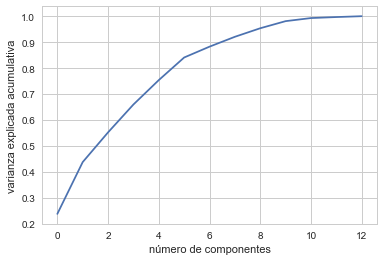

In [26]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('número de componentes')
plt.ylabel('varianza explicada acumulativa');

In [27]:
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(datos_escalados)
principalComponents.shape

(41188, 9)

* Se completa el dataset para aplicar al modelo

In [28]:
principalDf = pd.DataFrame(data = principalComponents)
finalDf = pd.concat([principalDf, df_limpiar[['y']]], axis = 1)
finalDf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,41188.0,-1.339548e-15,0.521972,-0.811987,-0.508922,0.051145,0.275771,0.915226
1,41188.0,4.186659e-16,0.476917,-0.806312,-0.575980,0.052188,0.197149,0.851687
2,41188.0,1.806660e-17,0.361389,-0.309224,-0.192376,-0.143714,-0.072778,0.957196
3,41188.0,-1.688354e-16,0.349823,-0.630548,-0.284848,-0.015244,0.264540,0.659424
4,41188.0,2.394245e-17,0.327357,-0.579653,-0.264272,-0.128595,0.300917,0.787392
5,41188.0,3.215126e-16,0.315087,-0.689002,-0.245477,0.022005,0.224025,1.124693
6,41188.0,-5.744113e-18,0.218225,-0.722238,-0.147942,-0.004693,0.167178,0.837743
7,41188.0,2.071547e-16,0.208137,-0.614000,-0.120321,-0.015953,0.087281,0.957514
8,41188.0,4.123274e-17,0.193725,-0.370503,-0.147672,-0.032605,0.116317,0.789910
y,41188.0,1.126542e-01,0.316173,0.000000,0.000000,0.000000,0.000000,1.000000


* Validamos la correlación nuevamente

In [29]:
correlations = finalDf.corr()
correl(correlations)

,0,1,2,3,4,5,6,7,8,y
0,1,4.7e-16,-9.1e-17,-6.3e-17,4.8e-16,1.4e-15,2.3e-16,6.2e-16,-9.3e-17,-0.15
1,4.7e-16,1,3.5e-16,5.4e-16,4.8e-16,-1.2e-16,-8.2e-17,4.3e-16,-3e-16,-0.11
2,-9.1e-17,3.5e-16,1,-1.2e-15,-1.2e-16,-1.1e-16,-3.9e-16,2.2e-17,2.8e-16,-0.011
3,-6.3e-17,5.4e-16,-1.2e-15,1,-2.9e-16,-1.4e-16,2.1e-16,6.4e-16,-1.2e-16,-0.0028
4,4.8e-16,4.8e-16,-1.2e-16,-2.9e-16,1,8e-17,-7e-17,1.8e-16,-4.1e-16,-0.021
5,1.4e-15,-1.2e-16,-1.1e-16,-1.4e-16,8e-17,1,-1.7e-16,-4.7e-16,9.9e-17,0.18
6,2.3e-16,-8.2e-17,-3.9e-16,2.1e-16,-7e-17,-1.7e-16,1,8.5e-16,-2.1e-16,-0.071
7,6.2e-16,4.3e-16,2.2e-17,6.4e-16,1.8e-16,-4.7e-16,8.5e-16,1,-2.9e-16,0.11
8,-9.3e-17,-3e-16,2.8e-16,-1.2e-16,-4.1e-16,9.9e-17,-2.1e-16,-2.9e-16,1,-0.019
y,-0.15,-0.11,-0.011,-0.0028,-0.021,0.18,-0.071,0.11,-0.019,1


## Modelamiento

En primer instancia se va a aplicar la información del análisis por componentes (PCA) y observar que pasa con el modelo.

* Se divide el dataset en partes de entrenamiento y prueba

In [30]:
x_train, x_test, y_train, y_test = train_test_split( finalDf,target, test_size=0.2)

1. **** Regresión logística **** 

Se aplica el solver **lbfgs** el cual es mucho más eficiente y veloz

* Evaluamos la precisión del algoritmo

In [31]:
lr = LogisticRegression(solver = 'lbfgs', max_iter=100);
lr.fit(x_train, y_train);
y_pred = lr.predict(x_test);
pd.DataFrame(y_pred).transpose()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,8213,8214,8215,8216,8217,8218,8219,8220,8221,8222,8223,8224,8225,8226,8227,8228,8229,8230,8231,8232,8233,8234,8235,8236,8237
0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0


---
#### Primera conclusión

* Se observa que el modelo está respondiendo en un 100% con la información que se le envía, por lo cual es mejor replantear el uso de los datos, ya que al aplicar esta técnica se hace un sobre entrenamiento del modelo.
* Los componentes generados por esta téncnica no deben aplicarse al modelo ya que esto no es adecuado y la información va a presentar un sobrentrenamiento.

In [32]:
print("Score:",lr.score(x_test,y_test))
print("accuracy_score:",accuracy_score(y_true = y_test, y_pred = y_pred))
print("jaccard_similarity_score",jaccard_similarity_score(y_true=y_test, y_pred=y_pred))
print(print("\n\nclassification_report\n---------------------\n",classification_report(y_true=y_test, y_pred=y_pred)))

Score: 1.0
accuracy_score: 1.0
jaccard_similarity_score 1.0


classification_report
---------------------
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      7287
          1       1.00      1.00      1.00       951

avg / total       1.00      1.00      1.00      8238

None


* Creamos y graficamos la matriz de confusión, la cual nos confirma una vez más que algo anda mal con el modelo.

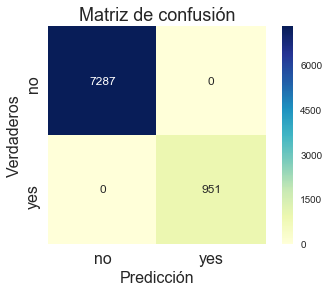

In [33]:
lr_cm = confusion_matrix(y_test, y_pred)
print('\n')
ax= plt.subplot()
sns.heatmap(lr_cm, annot=True, ax = ax,square=True, cmap="YlGnBu", annot_kws={"size":12}, fmt="d");
ax.set_xlabel('Predicción' , fontsize='16');
ax.set_ylabel('Verdaderos' , fontsize='16'); 
ax.set_title('Matriz de confusión', fontsize='18'); 
ax.xaxis.set_ticklabels(['no', 'yes'], fontsize='16'); 
ax.yaxis.set_ticklabels(['no', 'yes'], fontsize='16');

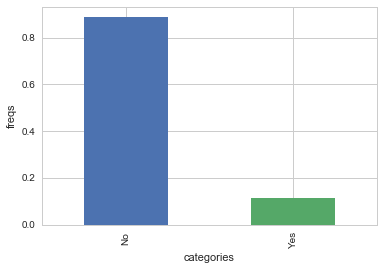

In [34]:
category_y=pd.Categorical(finalDf.y)
c=category_y.describe()
c=c.reset_index()
c.categories=c.categories.replace([0],'No')
c.categories=c.categories.replace([1],'Yes')
c.plot(x='categories', y='freqs', kind="bar", legend =False)
plt.ylabel("freqs")
plt.show();

* Validamos el target para serciorarnos el % de la precisión mostrada en el modelo
* Se observa un peso elevado en una de las categorias del target y con las observaciones anteriores de media, se ven que están claramente definidos los grupos de las clases

## Análisis exploratorio Nro 2

* Se va a realizar nuevamente la importación de la información para evitar usar dataset que ya se hayan cargado antes.  

** Importación de los datos **

* Revisión de tipos de datos en el dataset: Se grafican los tipos de datos existentes en el dataset, esto va a permitir tomar decisiones para el tratamiento del mismo (busqueda de variables categoricas).
* Revisión de nulos en el dataset: Es importante conocer la cantidad de información que pueda existir faltante en el dataset.
* Balanceo de la información en el dataset: Muestra el estado actual de la variable objetivo, mostrando si esta o no desbalanceada.

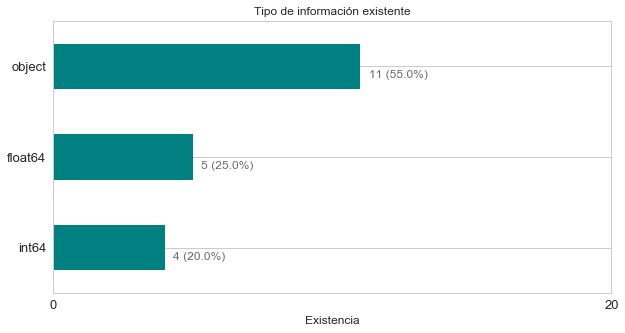

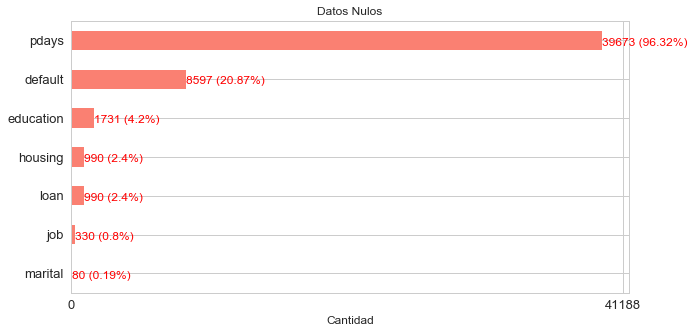

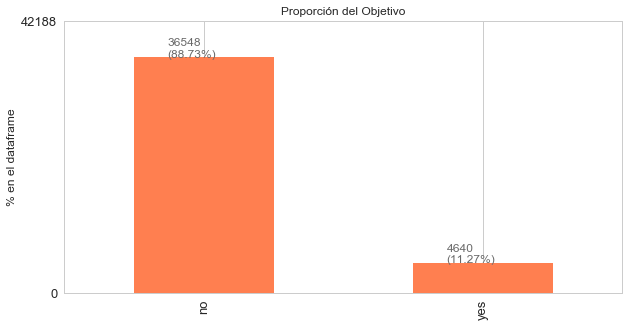

In [35]:
# Se importan los datos nuevamente
df = pd.read_csv('bank_af.csv', delimiter=";")
df=df.drop(['duration'], axis=1)

# Revisión de tipos de datos en el dataset
grafica_hor(data_description_ltype(df),'tipos', 'Tipo de información existente','Existencia');

# Revisión de nulos en el dataset
plt.subplots(1, 1)
grafica_nul(df);

# Balanceo de la información en el dataset
plt.subplots(1, 1)
grafica_ver(df,'y','Proporción del Objetivo', '% en el dataframe');

* Eliminación de variable que no aporta valor para el modelo: en este caso se revisa que la variable pdays tiene el 96% de la información con valores nulos (aprox), por lo cual no aporta valor al modelo.
* Luego de esto se grafica y se observa que las variables que quedan, tienen un bajo contenido de información nula, las cuales se pueden tratar por medio de imputaciones o simplemente se asigna una categoria (unknown); se opta por la segunda opción.

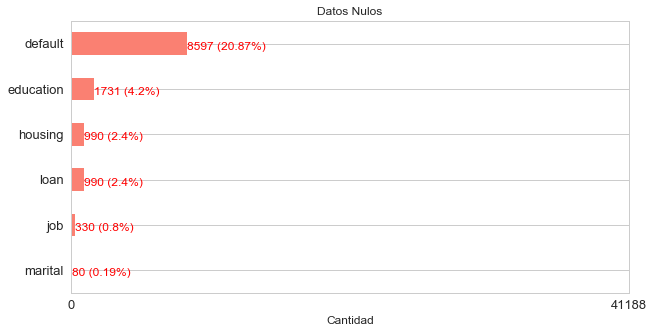

In [36]:
# Eliminación de variable que no aporta valor para el modelo
df=df.drop('pdays',axis=1)
grafica_nul(df)

* El siguiente paso exploratorio es hacer una comparación de cada una de las variables con respecto al objetivo; la idea con esto es que por medio de una exploración visual se identifquen frecuencias que permitan tomar decisiones más claras al momento de aplicar el modelo

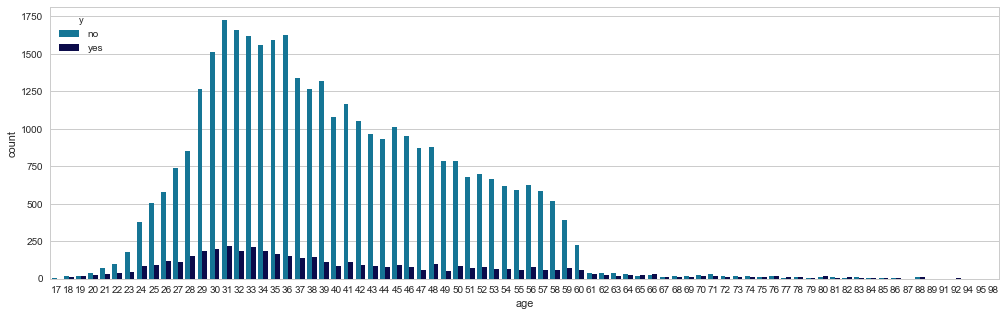

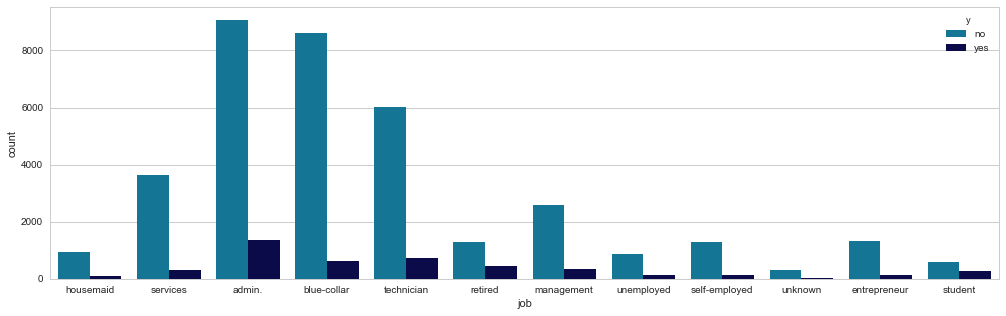

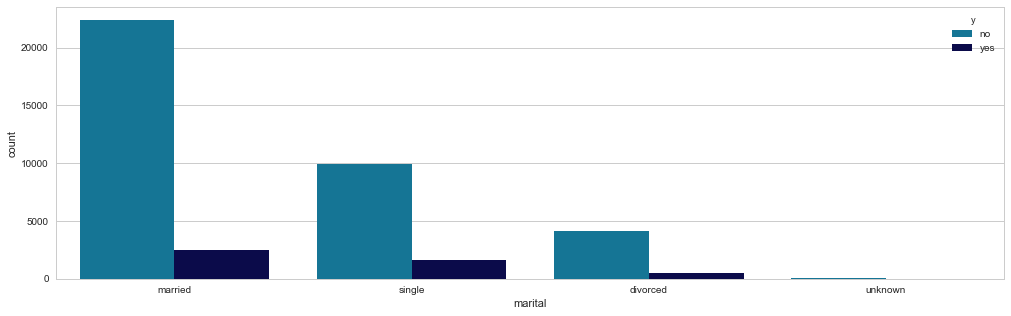

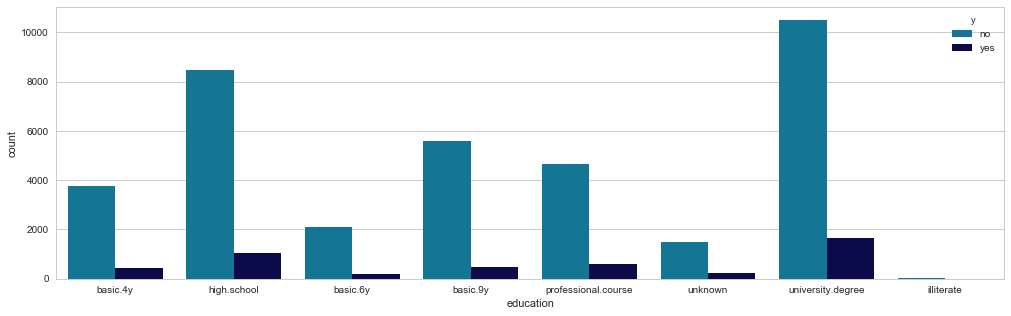

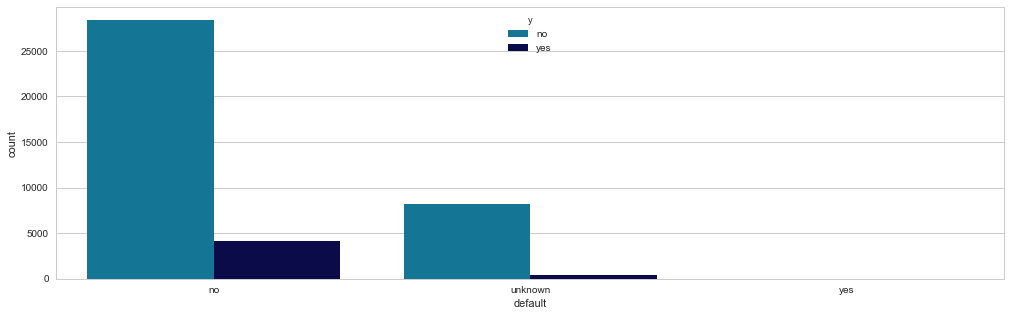

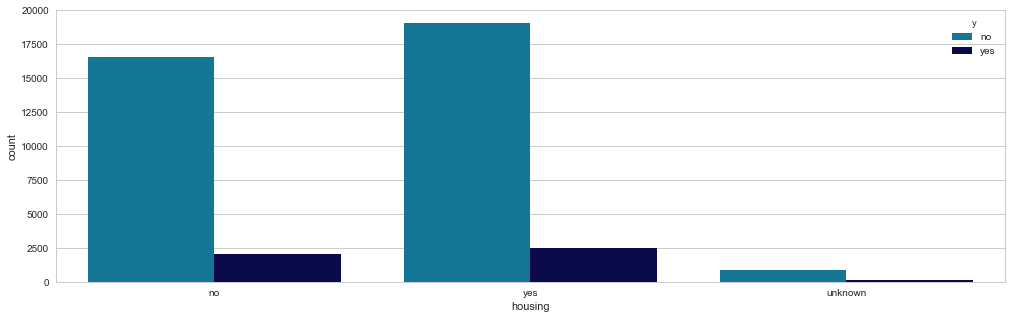

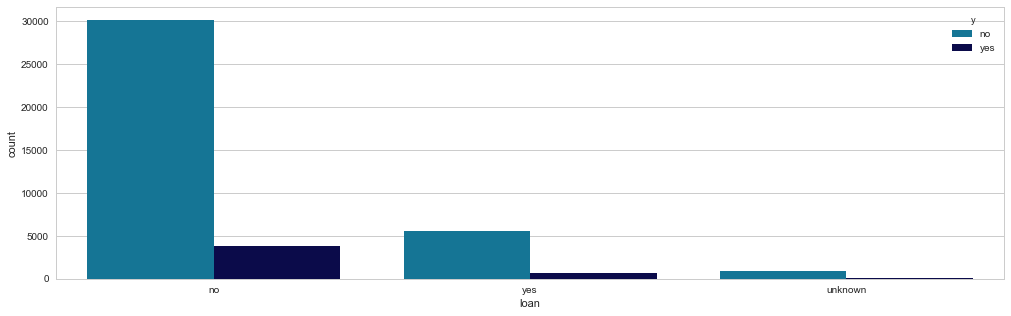

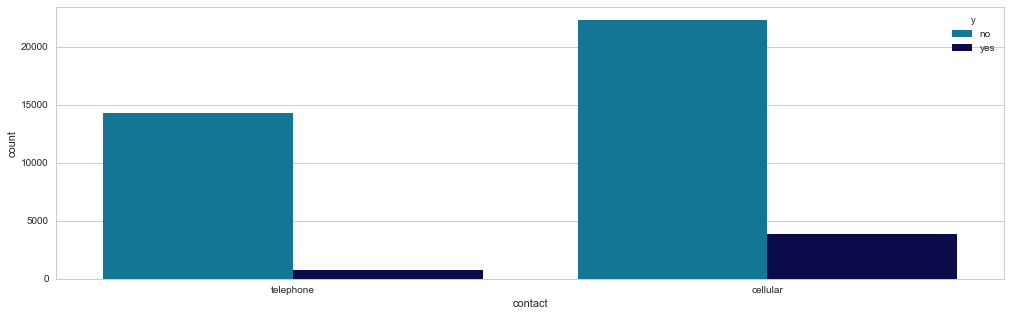

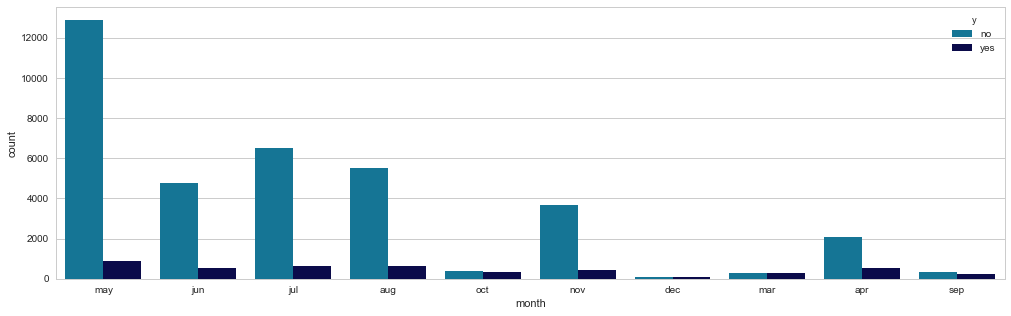

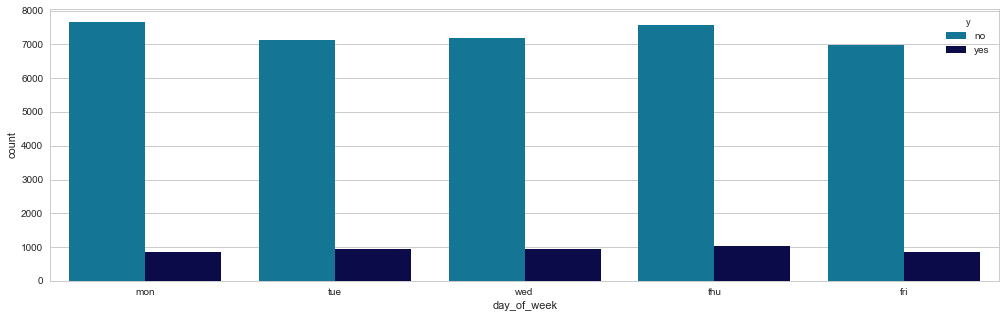

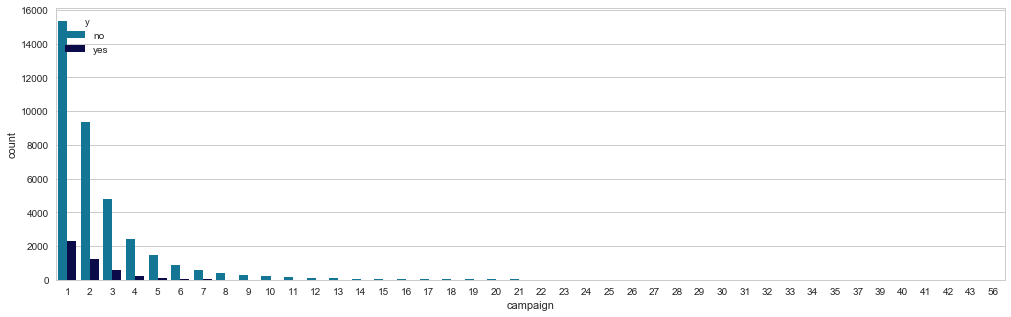

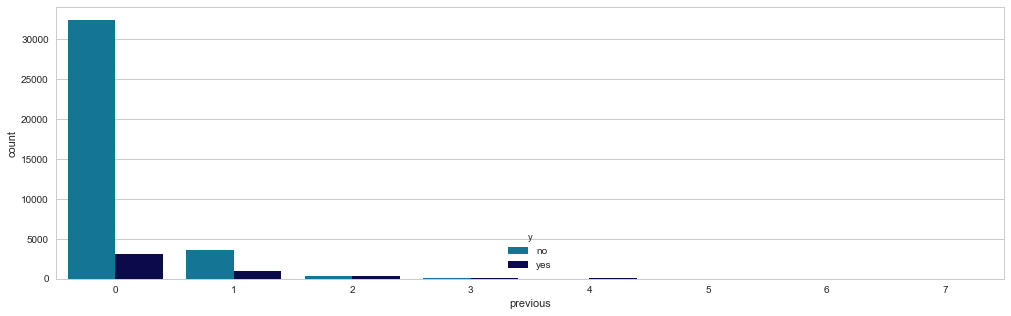

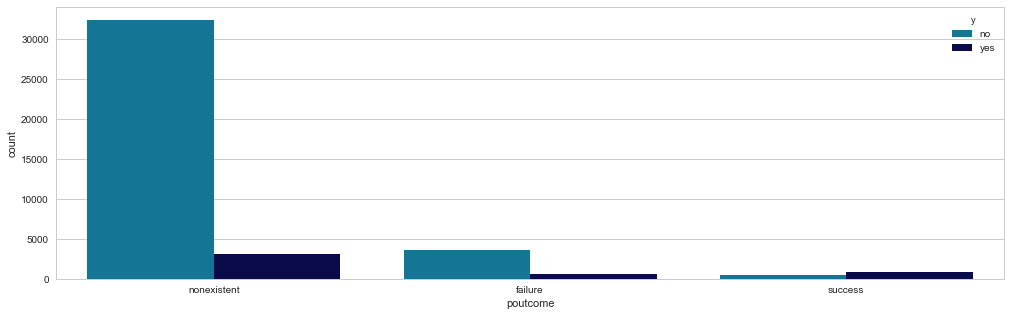

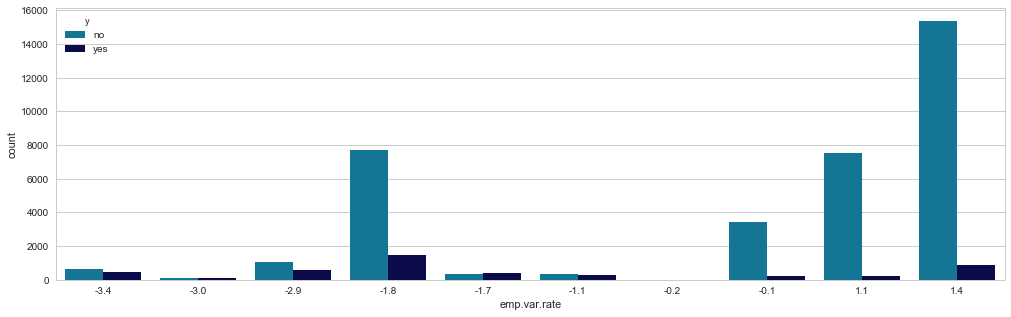

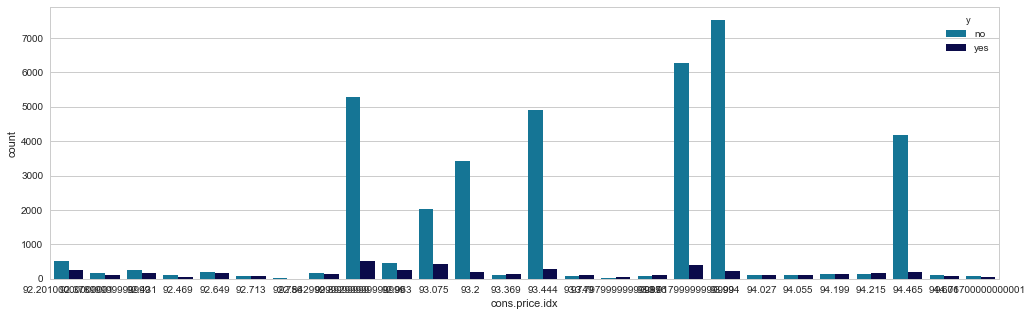

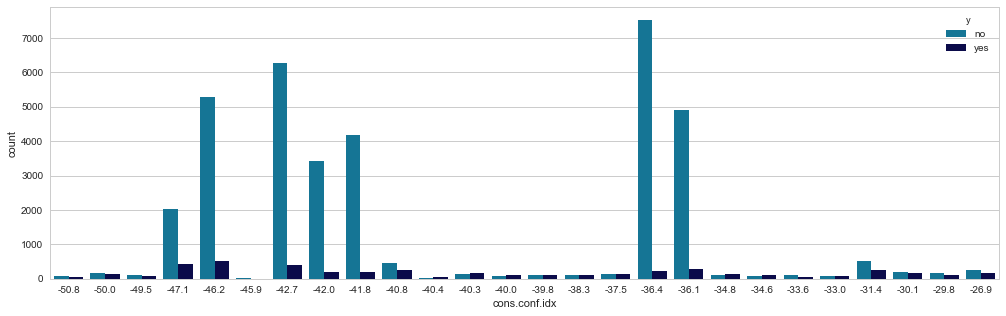

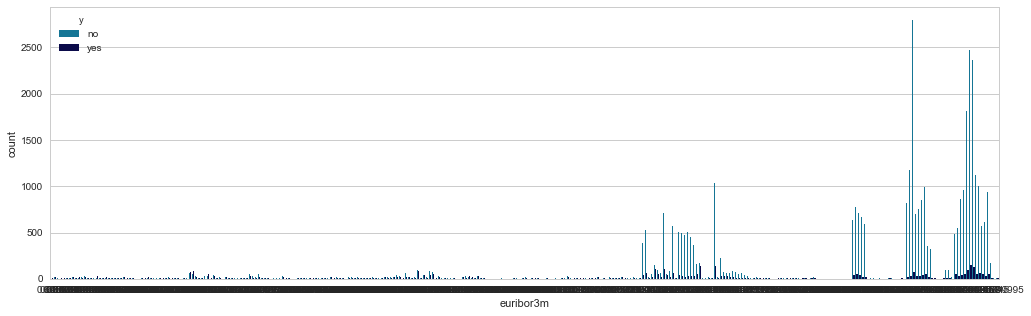

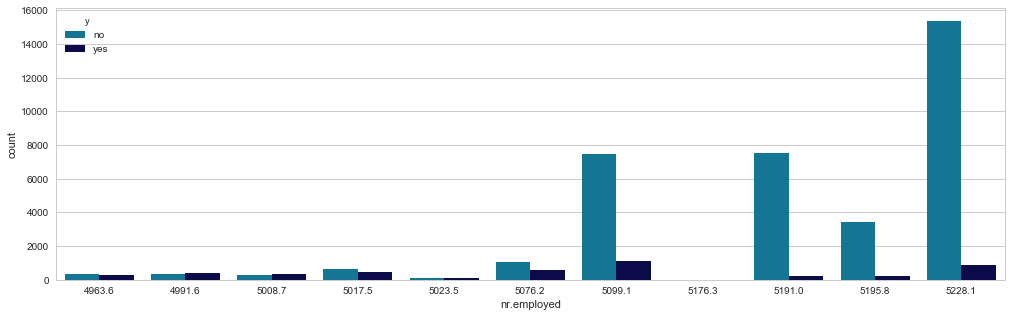

In [37]:
df_labels=df.columns[:-1];
for i in range(len(df_labels)):
    f, ax = plt.subplots(figsize=(17,5));
    sns.countplot(x=df_labels[i], hue="y", data=df, ax=ax, palette="ocean_r");
    plt.show();

* La variable education es una variable categorica con jerarquia, como se conoce su jerarquia, se hace una conversión de factor manualmente respetando la jerarquia que se presenta entre los contenidos de esta variable.

In [38]:
education=pd.DataFrame(df.groupby('education').size()).reset_index()
education.columns=['education','Conteo']
education

,education,Conteo
0,basic.4y,4176
1,basic.6y,2292
2,basic.9y,6045
3,high.school,9515
4,illiterate,18
5,professional.course,5243
6,university.degree,12168
7,unknown,1731


In [39]:
df.education=df['education'].replace(['unknown','illiterate','basic.4y','basic.6y','basic.9y','high.school','professional.course','university.degree']
                                    ,['0','1','2','3','4','5','6','7'])
df.education=pd.to_numeric(df['education'])
pd.DataFrame(pd.DataFrame(df.education.values, columns=['education']).groupby('education').size(), 
             columns=['Conteo']).reset_index()

,education,Conteo
0,0,1731
1,1,18
2,2,4176
3,3,2292
4,4,6045
5,5,9515
6,6,5243
7,7,12168


* Ya plenamente identificadas las variables y aplicadas las transformaciones necesarias, se va a usar la técnica de imputación de dummies para las variables tipo categoricas, ya que no podemos determinar si existe jerarquia entre ellas; a excepción de nuestro objetivo que se puede volver tipo factor para darle valores que en este caso se comportará como si fuese un binario (1, 0), para las demas variables categoricas se aplica la técnica antes dicha.

In [40]:
target = factor(pd.DataFrame(df.loc[:,['y']].values, columns=['target']))
labels_data=get_labels(df,'y')
labels_t=limpiar_labels(labels_data, 'text')
labels_n=limpiar_labels(labels_data, 'num')
df_dummy = pd.get_dummies(df[labels_t])
df_final=pd.concat([df[labels_n],df_dummy, target], axis=1)
labels_dummy=df_final.columns
print('\nNueva descripción de la información transformada a tipo dummies\n')
df_final.describe().transpose()


Nueva descripción de la información transformada a tipo dummies



,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
education,41188.0,4.944037,1.909312,0.000,4.000,5.000,7.000,7.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100
education,41188.0,4.944037,1.909312,0.000,4.000,5.000,7.000,7.000


* Aplicamos matriz de correlacion entre variables, en las cuales los colores azules indican una alta correlación entre las variablas (no significa que exista una fuerte relación entre estas, para ello se debería hacer prueba de hipotesis).

In [41]:
correlations = df.corr()
correl(correlations)

,age,education,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1,-0.18,0.0046,0.024,-0.00037,0.00086,0.13,0.011,-0.018
education,-0.18,1,-0.0017,0.017,-0.039,-0.097,0.038,-0.03,-0.021
campaign,0.0046,-0.0017,1,-0.079,0.15,0.13,-0.014,0.14,0.14
previous,0.024,0.017,-0.079,1,-0.42,-0.2,-0.051,-0.45,-0.5
emp.var.rate,-0.00037,-0.039,0.15,-0.42,1,0.78,0.2,0.97,0.91
cons.price.idx,0.00086,-0.097,0.13,-0.2,0.78,1,0.059,0.69,0.52
cons.conf.idx,0.13,0.038,-0.014,-0.051,0.2,0.059,1,0.28,0.1
euribor3m,0.011,-0.03,0.14,-0.45,0.97,0.69,0.28,1,0.95
nr.employed,-0.018,-0.021,0.14,-0.5,0.91,0.52,0.1,0.95,1


* Para que la información quede en una misma escala para el análisis, se le debe aplicar alguna técnica que permita llevarla a unos rangos entre 0 y 1; se elige la técnica de MinMax.

In [42]:
scaler = MinMaxScaler()
datos = scaler.fit_transform(df_final)
datos=pd.DataFrame(datos, columns=[labels_dummy])
print('\nNuevo escalamiento de la información\n')
datos.describe().transpose()


Nuevo escalamiento de la información



,count,mean,std,min,25%,50%,75%,max
age,41188.0,0.284248,0.128657,0.0,0.185185,0.259259,0.370370,1.0
education,41188.0,0.706291,0.272759,0.0,0.571429,0.714286,1.000000,1.0
campaign,41188.0,0.028502,0.050364,0.0,0.000000,0.018182,0.036364,1.0
previous,41188.0,0.024709,0.070700,0.0,0.000000,0.000000,0.000000,1.0
emp.var.rate,41188.0,0.725393,0.327283,0.0,0.333333,0.937500,1.000000,1.0
cons.price.idx,41188.0,0.535723,0.225581,0.0,0.340608,0.603274,0.698753,1.0
cons.conf.idx,41188.0,0.430854,0.193648,0.0,0.338912,0.376569,0.602510,1.0
euribor3m,41188.0,0.677237,0.393210,0.0,0.160961,0.957379,0.980957,1.0
nr.employed,41188.0,0.769134,0.273163,0.0,0.512287,0.859735,1.000000,1.0
education,41188.0,0.706291,0.272759,0.0,0.571429,0.714286,1.000000,1.0


* Revisamos que despúes del escalado la información siga teniendo la misma distribución, para esto graficamos y usamos gráficas de bigotes.

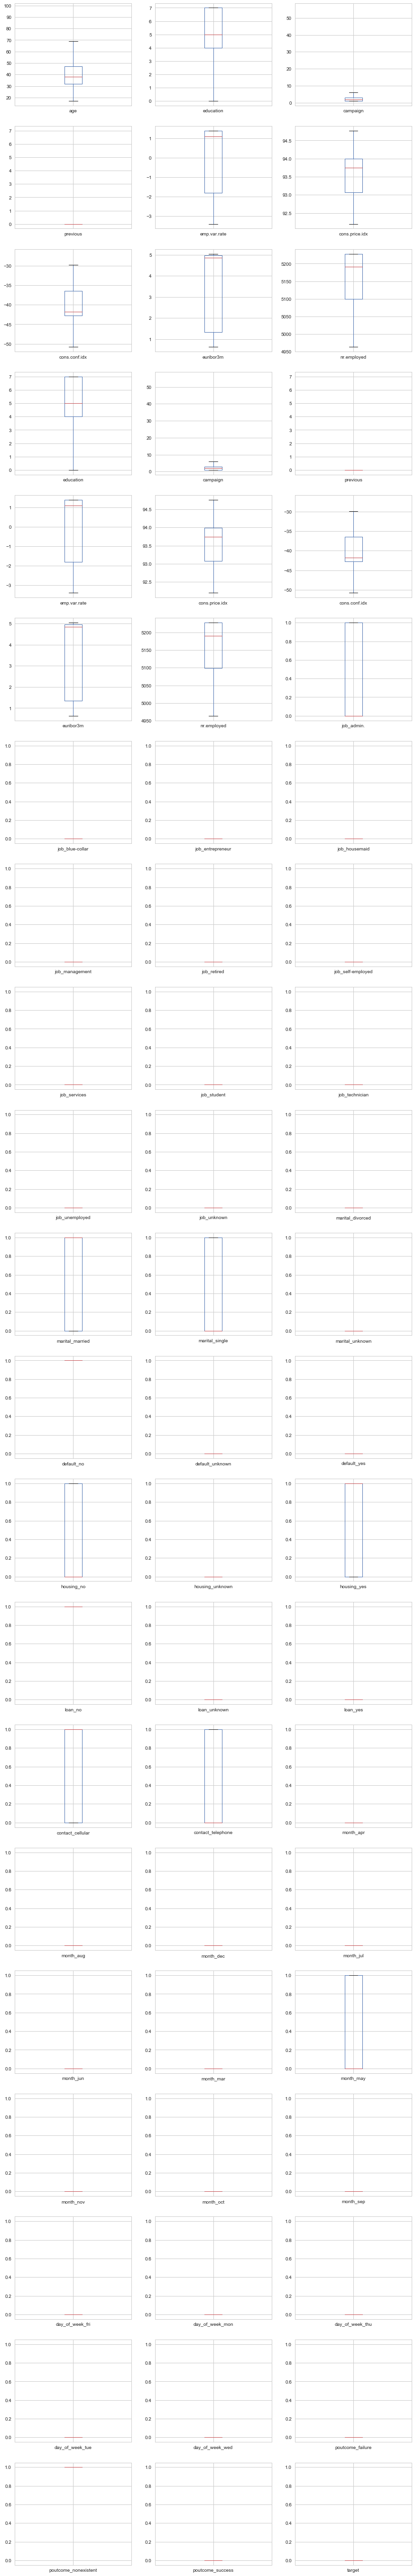

In [43]:
df_final.plot(kind='box', subplots=True, layout=(63,3), sharex=False, sharey=False, figsize=(15,300))
plt.show();

* Observamos la proporción de la información de nuestro objetivo.

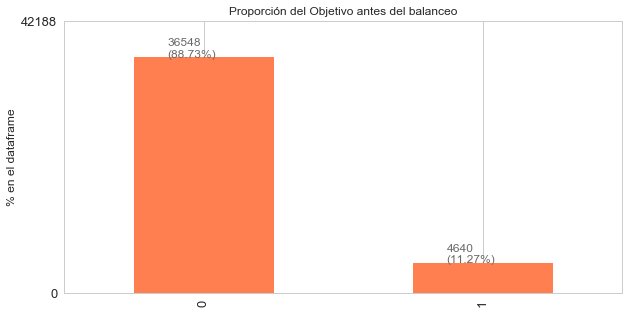

In [44]:
grafica_ver(df_final,'target','Proporción del Objetivo antes del balanceo', '% en el dataframe');

* Una vez analizado el dataset se opta por realizar un balanceo, que consiste en tomar una parte aleatoria del dataset completo, teniendo como referencia la variable objetivo con menor cantidad de datos existentes; luego de esto, se construyen 2 dataset nuevos, uno para el entrenamiento que es la parte balanceada y la parte excedente se usará para la  prueba de los modelos.

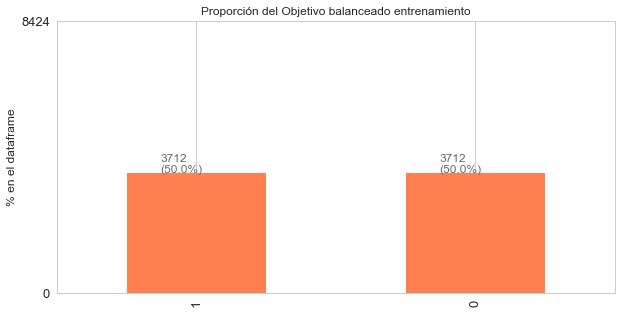

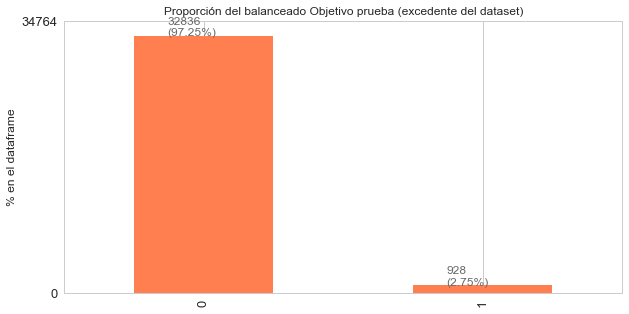

In [45]:
finalDf_train, finalDf_test=balanceo(df_final,objetivo='target',tam_muestra=80)
grafica_ver(finalDf_train,'target','Proporción del Objetivo balanceado entrenamiento', '% en el dataframe');
plt.subplots(1, 1);
grafica_ver(finalDf_test,'target','Proporción del balanceado Objetivo prueba (excedente del dataset)'
            , '% en el dataframe');

* Revisamos que no nos afecte el comportamiento original de la información para que el modelo no reciba información sesgada o incompleta; para esto usamos una gráfica de densidad.

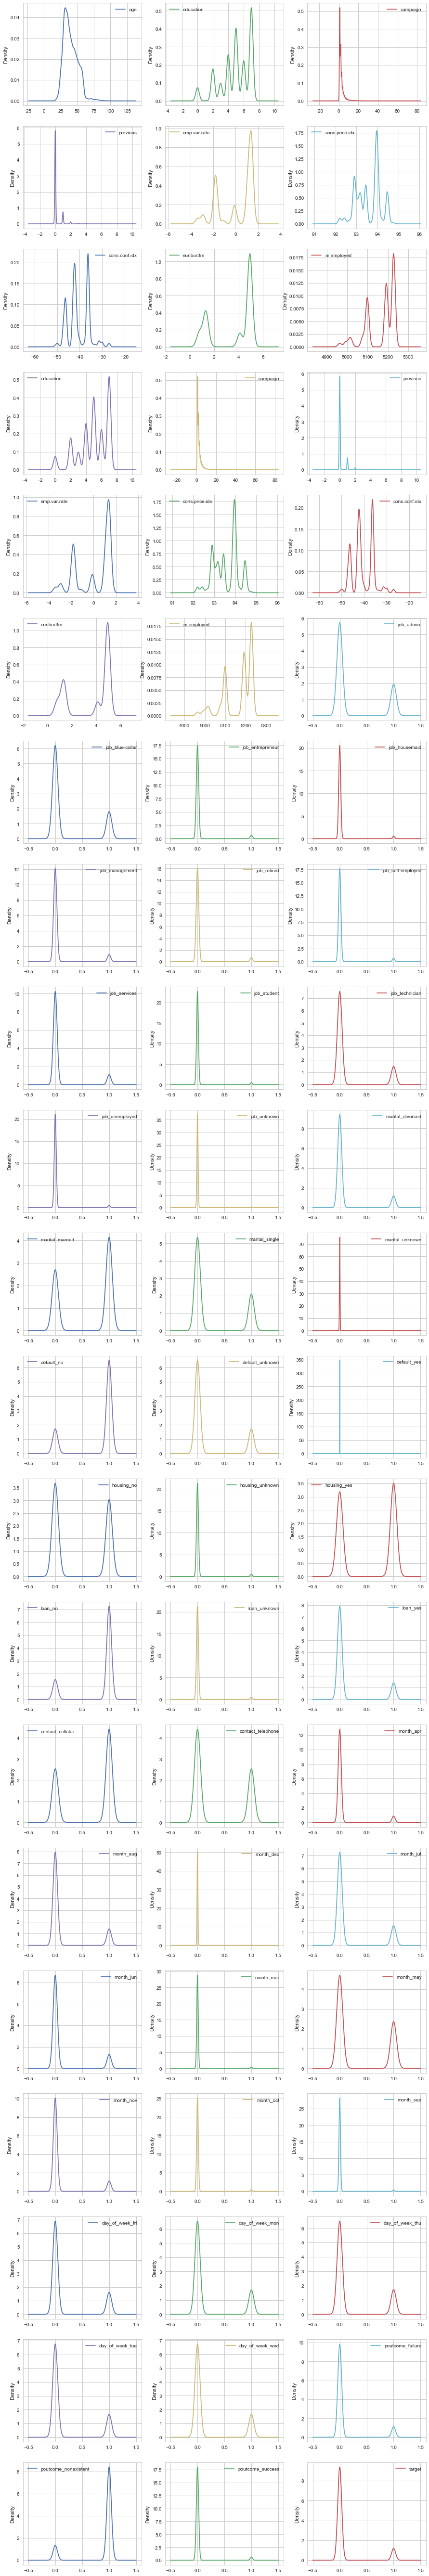

In [46]:
df_final.plot(kind='density', subplots=True, layout=(64,3), sharex=False, figsize=(15,300));
plt.show();

* Se valida visualmente con gráfica de bigotes, la concordacia de la información y se observa que se mantiene.

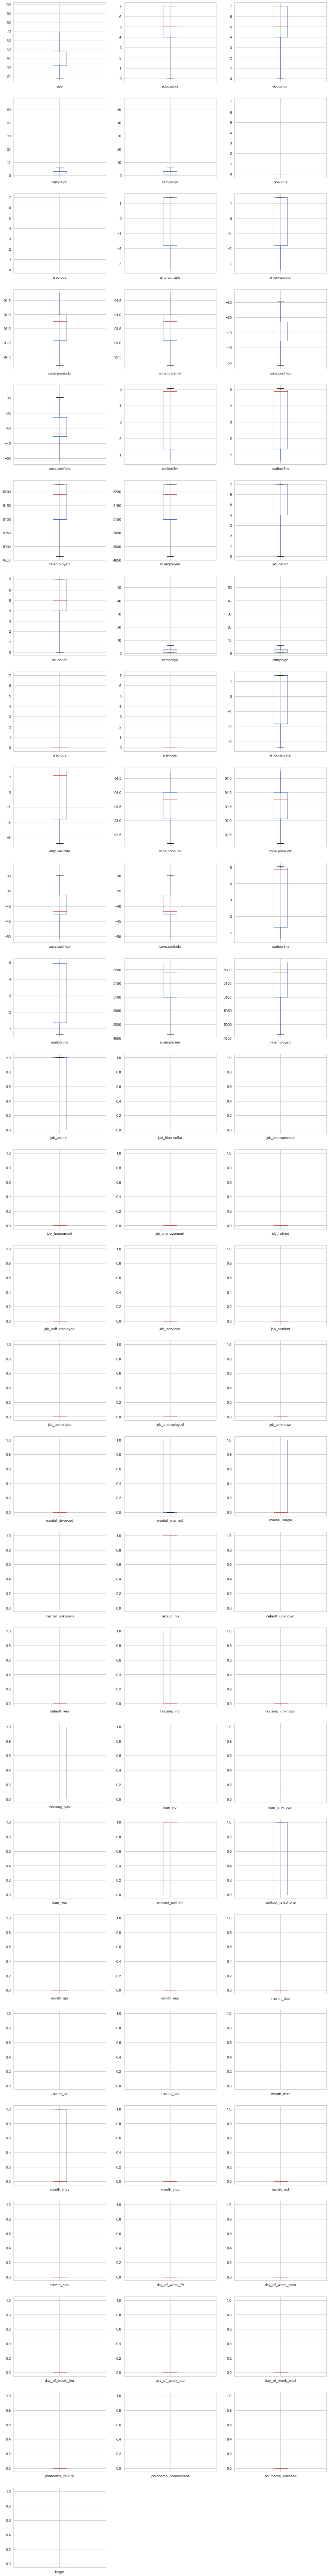

In [47]:
df_final[labels_dummy].plot(kind='box', subplots=True, layout=(64,3), sharex=False, sharey=False, figsize=(15,300));
plt.show();

* Graficamos la matriz de correlación  
Muestra en las partes más claras una alta correlación positiva entre las variables y en las partes más oscuras una correlación negativa.

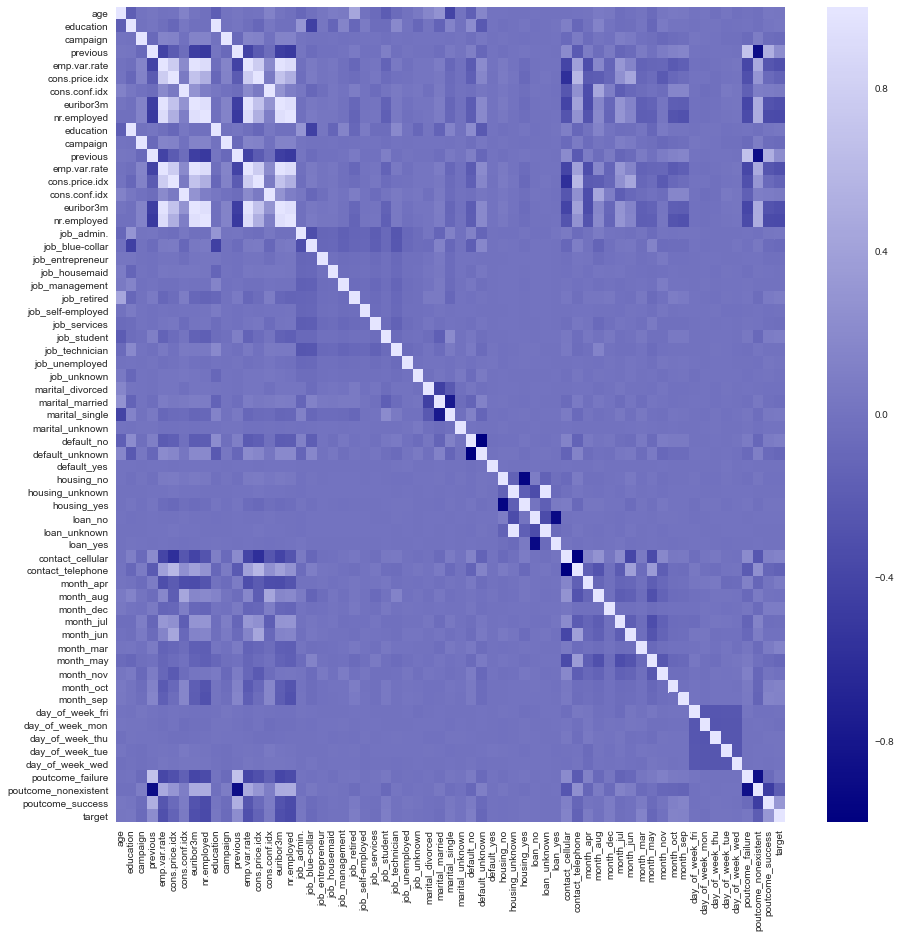

In [48]:
correlations=df_final.corr(method = 'pearson')
f, ax = plt.subplots(figsize=(15, 15));
cmap=sns.light_palette("navy", reverse=True, as_cmap=True);
sns.heatmap(correlations, fmt="d",ax=ax, cmap=cmap);

---
## Modelamiento Nro 2

Una vez se tienen listos los datos, es hora de aplicarlos a nuestros modelos.

- <h4> Linear Regresion (Regesión lineal / regresión logística) </h4>
    - <h5>Entrenamiento</h5>

Estadísticas de precisión

Score: 0.7313131313131314
accuracy_score: 0.7313131313131314
Tasa de error: 0.26868686868686864
jaccard_similarity_score 0.7313131313131314


classification_report
---------------------
              precision    recall  f1-score   support

          0       0.68      0.84      0.75       727
          1       0.80      0.63      0.70       758

avg / total       0.74      0.73      0.73      1485

None


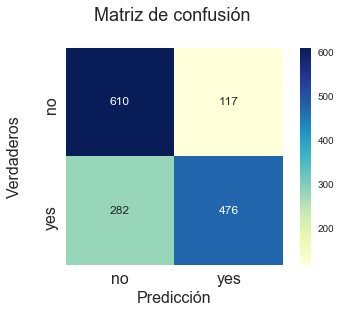

In [49]:
target_train = finalDf_train.loc[:,['target']].values
x_tr = finalDf_train.drop('target', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_tr,target_train, test_size=0.2)
lr = LogisticRegression(solver = 'lbfgs', max_iter=1000000);
lr.fit(x_train, y_train);
print('Estadísticas de precisión\n')
y_pred = lr.predict(x_test)
grafica_scores(lr, x_test, y_test, y_pred);
lr_cm = confusion_matrix(y_test, y_pred);
grafica_matriz_confusion(lr_cm);

* Con la aplicación de esta técnica, se ve un resultado más real al observado en la primera observación.
    - <h5>Prueba</h5>

Estadísticas de precisión

Score: 0.8264104842292315
accuracy_score: 0.8264104842292315
Tasa de error: 0.17358951577076853
jaccard_similarity_score 0.8264104842292315


classification_report
---------------------
              precision    recall  f1-score   support

          0       0.99      0.83      0.90     26243
          1       0.10      0.63      0.17       769

avg / total       0.96      0.83      0.88     27012

None


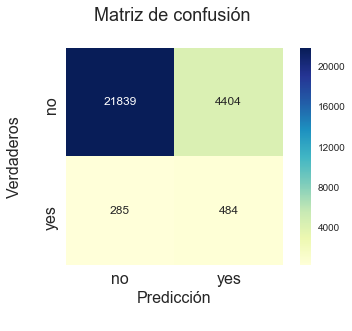

In [50]:
target_true=finalDf_test.loc[:,['target']].values
x_tr_true=finalDf_test.drop('target', axis=1);
x_train_true, x_test_true, y_train_true, y_test_true = train_test_split(x_tr_true,target_true, test_size=0.8);
print('Estadísticas de precisión\n')
y_test_pred_true=lr.predict(x_test_true);
grafica_scores(lr, x_test_true, y_test_true, y_test_pred_true);
lr_cm_true = confusion_matrix(y_test_true, y_test_pred_true);
grafica_matriz_confusion(lr_cm_true);

* Se observa una mayor precisión en el modelo cuando se aplican los datos de prueba. Obteniendose como resultado un mejor modelo comparado con el primero utilizado.

Se aplica un segundo tipo de modelado:

- <h4> Knn (K-Nearest Neighbors) </h4>
    - <h5>Entrenamiento</h5>

Estadísticas de precisión

Score: 0.7292929292929293
accuracy_score: 0.7292929292929293
Tasa de error: 0.2707070707070707
jaccard_similarity_score 0.7292929292929293


classification_report
---------------------
              precision    recall  f1-score   support

          0       0.69      0.82      0.75       729
          1       0.79      0.64      0.71       756

avg / total       0.74      0.73      0.73      1485

None


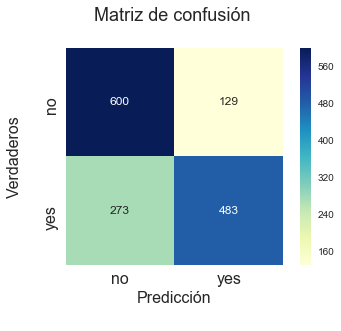

In [51]:
target_train = finalDf_train.loc[:,['target']].values
x_tr = finalDf_train.drop('target', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_tr,target_train, test_size=0.2)
knn = KNeighborsClassifier(n_neighbors=21);
print('Estadísticas de precisión\n')
knn.fit(x_train, y_train);
y_pred = knn.predict(x_test);
grafica_scores(knn, x_test, y_test, y_pred);
knn_cm = confusion_matrix(y_test, y_pred);
grafica_matriz_confusion(knn_cm);

* Con la aplicación de esta técnica, se observa un resultado similar al de la técnica de modelado anterior.  
* Procedemos a hacer la prueba con los demás datos del dataset balanceado.
    - <h5>Prueba</h5>

Estadísticas de precisión

Score: 0.8272989782318969
accuracy_score: 0.7971642233081594
Tasa de error: 0.2028357766918406
jaccard_similarity_score 0.7971642233081594


classification_report
---------------------
              precision    recall  f1-score   support

          0       0.99      0.80      0.88     26267
          1       0.09      0.67      0.15       745

avg / total       0.96      0.80      0.86     27012

None


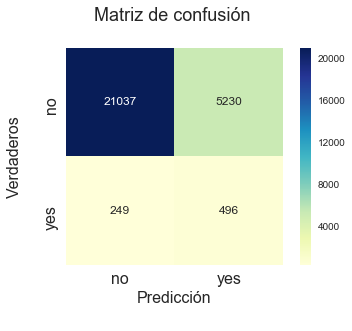

In [52]:
target_true=finalDf_test.loc[:,['target']].values
x_tr_true=finalDf_test.drop('target', axis=1)
x_train_true, x_test_true, y_train_true, y_test_true = train_test_split(x_tr_true,target_true, test_size=0.8);
print('Estadísticas de precisión\n')
y_test_pred_true=knn.predict(x_test_true);
grafica_scores(lr, x_test_true, y_test_true, y_test_pred_true);
knn_cm_true = confusion_matrix(y_test_true, y_test_pred_true);
grafica_matriz_confusion(knn_cm_true);

* Se observa una mayor precisión en el modelo cuando se aplican los datos de prueba. Obteniendose como resultado un mejor modelo comparado con el primero utilizado.

Se aplica un tercer tipo de modelado:

- <h4> Decision tree (Arbol de decisión) </h4>
    - <h5>Entrenamiento</h5>

Estadísticas de precisión

Score: 0.7185185185185186
accuracy_score: 0.7185185185185186
Tasa de error: 0.28148148148148144
jaccard_similarity_score 0.7185185185185186


classification_report
---------------------
              precision    recall  f1-score   support

          0       0.66      0.86      0.75       713
          1       0.82      0.59      0.69       772

avg / total       0.74      0.72      0.71      1485

None


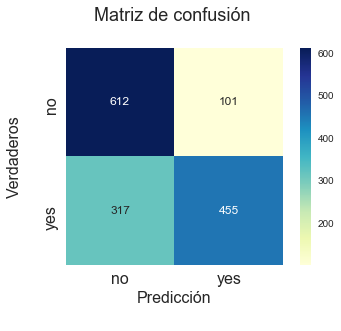

In [53]:
target_train = finalDf_train.loc[:,['target']].values
x_tr = finalDf_train.drop('target', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_tr,target_train, test_size=0.2)
clf = DecisionTreeClassifier(max_depth=2);
print('Estadísticas de precisión\n')
clf.fit(x_train, y_train);
y_test_pred = clf.predict(x_test);
clf_cm=confusion_matrix(y_test, y_test_pred);
grafica_scores(clf, x_test, y_test, y_test_pred);
grafica_matriz_confusion(clf_cm);

* Con la aplicación de esta técnica, se observa un resultado similar al de la técnica de modelado anterior.  
* Procedemos a hacer la prueba con los demás datos del dataset balanceado.
    - <h5>Prueba</h5>

Estadísticas de precisión

Score: 0.843699096697764
accuracy_score: 0.843699096697764
Tasa de error: 0.156300903302236
jaccard_similarity_score 0.843699096697764


classification_report
---------------------
              precision    recall  f1-score   support

          0       0.99      0.85      0.91     26261
          1       0.11      0.62      0.18       751

avg / total       0.96      0.84      0.89     27012

None


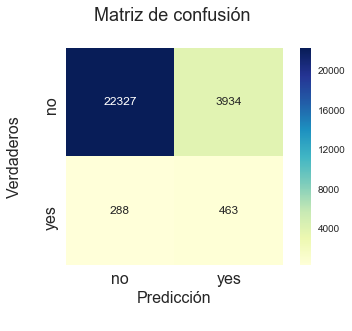

In [54]:
target_true=finalDf_test.loc[:,['target']].values
x_tr_true=finalDf_test.drop('target', axis=1)
x_train_true, x_test_true, y_train_true, y_test_true = train_test_split(x_tr_true,target_true, test_size=0.8)
y_test_pred_true=clf.predict(x_test_true);
print('Estadísticas de precisión\n')
grafica_scores(clf, x_test_true, y_test_true, y_test_pred_true);
clf_cm_true = confusion_matrix(y_test_true, y_test_pred_true);
grafica_matriz_confusion(clf_cm_true);

* Se observa una mayor precisión en el modelo cuando se aplican los datos de prueba. Obteniendose como resultado un mejor modelo comparado con el primero utilizado.

Se aplica un cuarto tipo de modelado:

- <h4> SVM - Support vector machine (Máquinas de vectores de soporte) </h4>
    - <h5>Entrenamiento</h5>

Estadísticas de precisión

Score: 0.734006734006734
accuracy_score: 0.734006734006734
Tasa de error: 0.265993265993266
jaccard_similarity_score 0.734006734006734


classification_report
---------------------
              precision    recall  f1-score   support

          0       0.69      0.85      0.76       737
          1       0.81      0.62      0.70       748

avg / total       0.75      0.73      0.73      1485

None


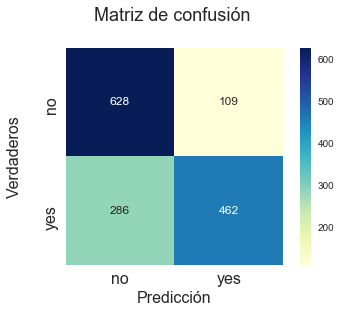

In [55]:
target_train = finalDf_train.loc[:,['target']].values
x_tr = finalDf_train.drop('target', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_tr,target_train, test_size=0.2)
svm = SVC(kernel='linear');
print('Estadísticas de precisión\n')
svm.fit(x_train, y_train);
y_test_pred = svm.predict(x_test);
svm_cm=confusion_matrix(y_test, y_test_pred);
grafica_scores(svm, x_test, y_test, y_test_pred);
grafica_matriz_confusion(svm_cm);

In [56]:
pd.DataFrame(svm.support_vectors_).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
0,48.0,7.0,4.0,1.0,-1.8,93.876,-40.0,0.672,5008.7,7.0,4.0,1.0,-1.8,93.876,-40.0,0.672,5008.7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,32.0,5.0,2.0,0.0,-1.8,92.893,-46.2,1.250,5099.1,5.0,2.0,0.0,-1.8,92.893,-46.2,1.250,5099.1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,41.0,3.0,1.0,0.0,1.1,93.994,-36.4,4.857,5191.0,3.0,1.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,50.0,0.0,1.0,0.0,1.4,93.918,-42.7,4.961,5228.1,0.0,1.0,0.0,1.4,93.918,-42.7,4.961,5228.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,40.0,4.0,1.0,1.0,-0.1,93.200,-42.0,4.153,5195.8,4.0,1.0,1.0,-0.1,93.200,-42.0,4.153,5195.8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


* Con la aplicación de esta técnica, se observa un resultado similar al de la técnica de modelado anterior.  
* Procedemos a hacer la prueba con los demás datos del dataset balanceado.
    - <h5>Prueba</h5>

Estadísticas de precisión

Score: 0.8275581223160077
accuracy_score: 0.8275581223160077
Tasa de error: 0.17244187768399233
jaccard_similarity_score 0.8275581223160077


classification_report
---------------------
              precision    recall  f1-score   support

          0       0.99      0.83      0.90     26252
          1       0.10      0.63      0.17       760

avg / total       0.96      0.83      0.88     27012

None


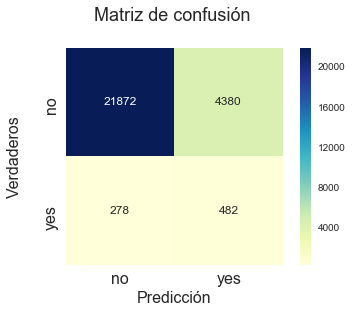

In [57]:
target_true=finalDf_test.loc[:,['target']].values
x_tr_true=finalDf_test.drop('target', axis=1)
x_train_true, x_test_true, y_train_true, y_test_true = train_test_split(x_tr_true,target_true, test_size=0.8)
y_test_pred_true=svm.predict(x_test_true);
print('Estadísticas de precisión\n')
grafica_scores(svm, x_test_true, y_test_true, y_test_pred_true);
svm_cm_true = confusion_matrix(y_test_true, y_test_pred_true);
grafica_matriz_confusion(svm_cm_true);

* Se observa una mayor precisión en el modelo cuando se aplican los datos de prueba. Obteniendose como resultado un mejor modelo comparado con el primero utilizado.

---
#### Segunda conclusión

* Aplicando una preparación previa a los datos, revisando que contiene, limpiandola pero sobre todo entendiendo el set de datos que se tiene, se logra un mejor trabajo con la aplicación de los modelos usados
* En cada uno de los modelos cuando se aplican los set de datos balanceados, se logra observar una respuesta similar, teniendo una variación muy baja entre cada uno de ellos

---
## Análisis final por matriz de confusión para los modelos utilizados

* Con los datos de entrenamiento

<p>Sobre los datos de entrenamiento se observa que entre la predicción de los datos reales, se mantiene la proporción de en la exacitud de cada uno de los modelos aplicados.</p>
<p>Entre cada uno de los modelos no hay una variación significativa en las puntuaciones.</p>

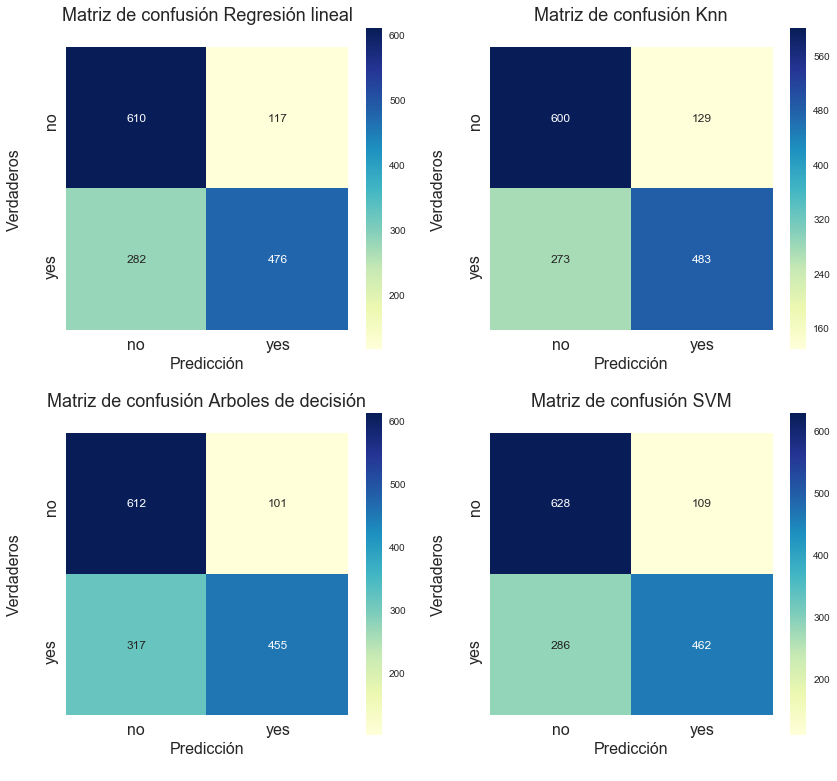

In [58]:
print('\n')
plt.figure(1, figsize=(12, 13));
plt.subplots_adjust(left=0.05, right=0.95);
ax = plt.subplot(221);
grafica_matriz_confusion(lr_cm, ax, 'Regresión lineal');
ax = plt.subplot(222);
grafica_matriz_confusion(knn_cm, ax, 'Knn');
ax = plt.subplot(223);
grafica_matriz_confusion(clf_cm, ax, 'Arboles de decisión');
ax = plt.subplot(224);
grafica_matriz_confusion(svm_cm, ax, 'SVM');

* Con los datos de prueba

Se observa mayor precisión cuando se agregan los datos de prueba en cada uno de los modelos, esto nos permite analizar que cuando lleguen nuevos datos, el modelo será capaz de hacer un pronostico muy acertado.

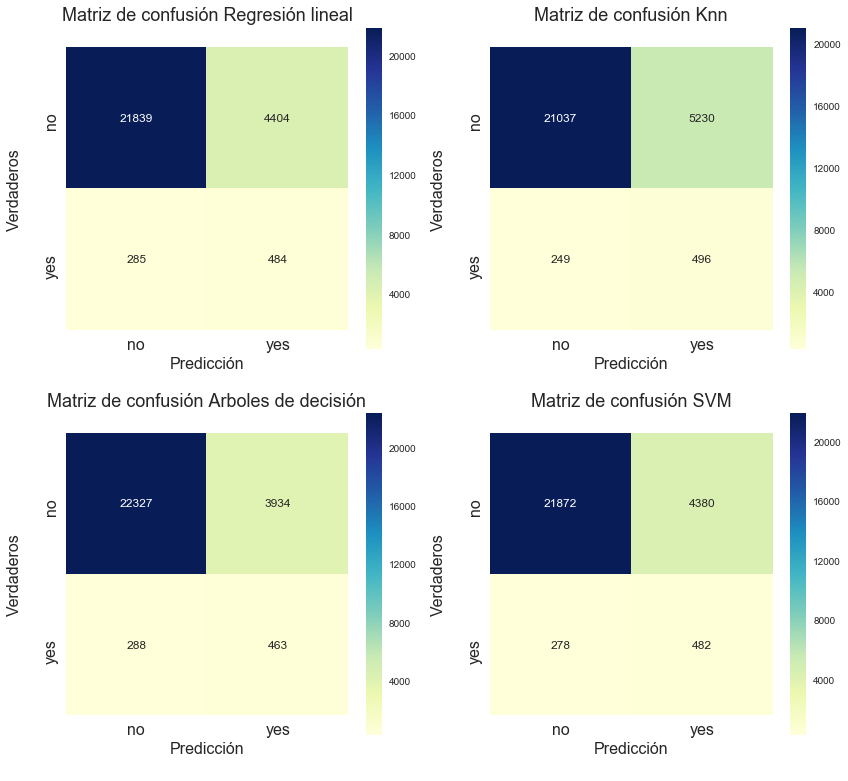

In [59]:
print('\n')
plt.figure(1, figsize=(12, 13));
plt.subplots_adjust(left=0.05, right=0.95);
ax = plt.subplot(221);
grafica_matriz_confusion(lr_cm_true, ax, 'Regresión lineal');
ax = plt.subplot(222);
grafica_matriz_confusion(knn_cm_true, ax, 'Knn');
ax = plt.subplot(223);
grafica_matriz_confusion(clf_cm_true, ax, 'Arboles de decisión');
ax = plt.subplot(224);
grafica_matriz_confusion(svm_cm_true, ax, 'SVM');

#### Recomendaciones

* Para que los análisis sean más acertados se recomienda primero conocer el negocio y la necesidad que tiene este con respecto a la información, esto ayudará a tomar mejores decisiones a la hora de aplicar modelos.
* Los modelos pueden tener comportamientos similares en su precisión para pronosticar, dependiendo esto de la cantidad de veces que se ejecute cada modelo y las configuraciones que se puedan aplicar a los mismos
--- 
* De la informacion analizada, se puede observar un claro comportamiento con tendencia a respuestas negativas en caso usar sin transformar los datos.
* Para este dataset puntualmente se tuvieron que aplicar técnicas de balanceo para que el modelo pudiera tener un mejor entrenamiento.
* De acuerdo a los resultados de precisión, los modelos tendrían un grado de confianza del 80% aproximadamente con nuevos datos